# Homework #5. Exploratory Data Analysis
#### Author: `Liza Andrych`
#### Total time spent on h/w (in minutes): 2400


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pywaffle import Waffle


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Liza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
DIALOGS_MERGED_DATA_PATH = "D:/data/old_data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:/data/old_data/merged_data/dialogs_users_all.csv"
pr_bl_m_path = "D:/data/merged_data/dialogs_data_all.csv"
pr_bl_path = "D:/data/merged_data/dialogs_users_all.csv"
GENDER_FILE = 'D:/Liza/CSS/data/gender.csv'

In [4]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)
prbl = pd.read_csv(pr_bl_m_path)
prbl_meta = pd.read_csv(pr_bl_path)
gender_ds = pd.read_csv(GENDER_FILE)

In [5]:
df['to_id'] = df['to_id'].apply(lambda x: str(x))
df_meta['dialog_id'] = df_meta['dialog_id'].apply(lambda x: str(x))

prbl['to_id'] = prbl['to_id'].apply(lambda x: str(x))
prbl['dialog_id'] = prbl['dialog_id'].apply(lambda x: str(x))

In [6]:
def find_name(id):
    st =''
    for i in df_meta.users:
        if str(id) in i and i!='users':
            st = i
            break
    if i =='': return 'no'
    st =[x.split(':') for x in i.split(',')] 
    res = st[1][1].replace('\'', '')
    t =''
    if len(st[2]) ==2:
         t = st[2][1].replace('\'', '')
    if t!=' None': res +=" "+t
    return res

In [7]:
df_meta['user_name'] = df_meta['users'].apply(lambda x: find_name(x))
df_meta['users'] = df_meta['users'].apply(lambda x: str(int([s.split(':') for s in x.split(',')][0][1].replace(' ', ''))))
df_meta = df_meta.rename(columns = {'users': 'user_id'}, inplace = False)
df['date'] = df['date'].apply(lambda x: (datetime.fromisoformat(x[0:19])))
df['dialog_id'] = df['dialog_id'].apply(lambda x: str(x))

In [8]:
df_meta.head(10)

dialog_id            name   type    user_id             user_name
0  -1001071205780  Лучший этаж(8)  Group  416106092           аліна стрн🪐
1  -1001071205780  Лучший этаж(8)  Group  435963418      Mariia  Biletska
2  -1001071205780  Лучший этаж(8)  Group  340206358   марина 🥁  лисецька!
3  -1001071205780  Лучший этаж(8)  Group  689763683    liera kropyvnytska
4  -1001071205780  Лучший этаж(8)  Group  575855030       Anastasiia Lysa
5  -1001071205780  Лучший этаж(8)  Group  623410888            maroshenko
6  -1001071205780  Лучший этаж(8)  Group  596564145   Nastia  Shashkevych
7  -1001071205780  Лучший этаж(8)  Group  784511784      Катя  Шведчикова
8  -1001071205780  Лучший этаж(8)  Group  550286754              катєнька
9  -1001071205780  Лучший этаж(8)  Group  336314102          Liza Andrych

In [9]:
my_id = '336314102'

# ☑


                                       
# #1. Amounts of messages people wrote in chats for different parts of a day




### I've decided to find part of a day when all my chats are more active. Due to this analysis we can understand when students spend more time in telegram.

In [10]:
def part_of_day(hour):
    if 0<=int(hour) & int(hour)<=4 : 
        return 'Late Night'
    if 5<=int(hour) & int(hour)<=8 :
        return 'Early Morning'
    if 9<=int(hour) & int(hour)<=12:
        return 'Morning'
    if 13<=int(hour) & int(hour)<=16:
        return 'Noon'
    if 17<=int(hour) & int(hour)<=20:
        return 'Eve'
    return "Night"

In [11]:
time_df = df[~df['to_id'].str.contains('PeerChannel', na = False)]
time_df["hour"] = time_df["date"].apply(lambda x: x.hour)
time_df['part_of_day'] = time_df["hour"].apply(lambda x: part_of_day(x))
total = time_df.groupby(["hour", "part_of_day"], as_index=False)["message"].count()
colors = {'Late Night': "#003367",
          'Early Morning':"#F3CD05",
          'Morning': "#F49F05",
          'Noon':"#F18904",
          'Eve': "#36688D",
          'Night':"#28497a"}

## 1.1 General activity during a day

Text(0.5, 0, 'Hour')

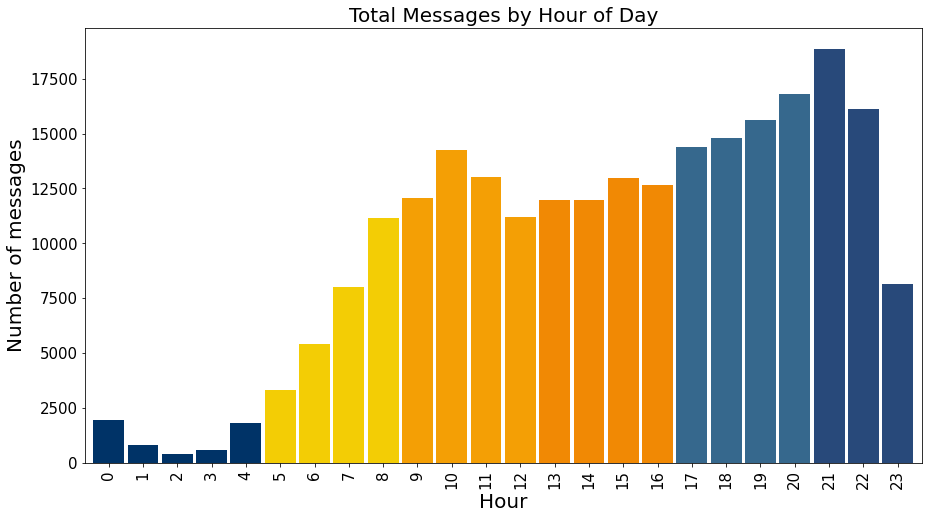

In [12]:
pl = total.set_index("hour")["message"].plot(kind="bar", color=[colors[i] for i in total['part_of_day']],
                                                     fontsize = 15,width=0.9,title="Total Messages by Hour of Day",figsize=(15, 8))
pl.axes.title.set_size(20)
pl.set_ylabel('Number of messages', fontsize=20)
pl.set_xlabel('Hour', fontsize=20)

## Understanding tips:
using colors we can see a part of day it is.


## What's interesting:
 People are most active in evenings.
Most active hour for evenings is 9 pm. Most active hour during daytime is 10 am

## 1.2 My activity during a day


Text(0.5, 0, 'Hour')

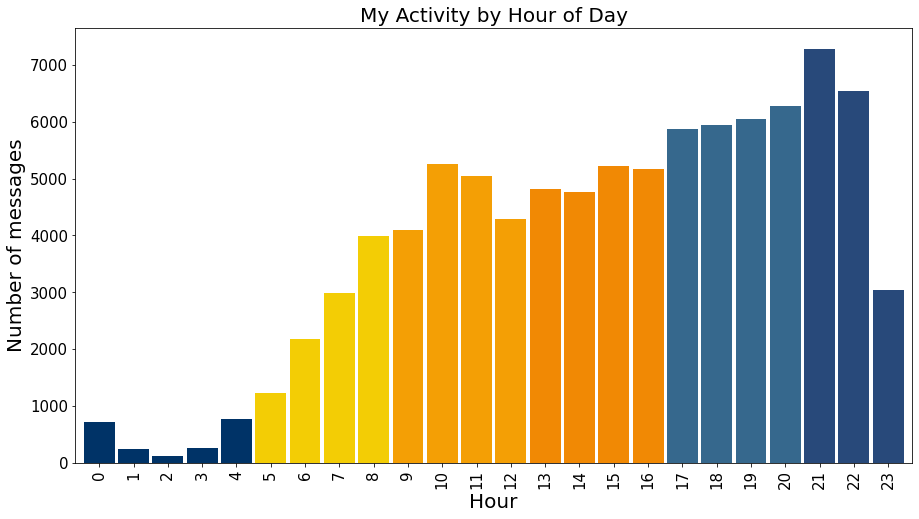

In [13]:
my_mes = time_df[time_df['from_id'].str.contains(my_id, na = False)].groupby(["hour", "part_of_day"], as_index=False)["message"].count()
pl = my_mes.set_index("hour")["message"].plot(kind="bar", color=[colors[i] for i in my_mes['part_of_day']],
                                                     fontsize = 15,width=0.9,title="My Activity by Hour of Day",figsize=(15, 8))
pl.axes.title.set_size(20)
pl.set_ylabel('Number of messages', fontsize=20)
pl.set_xlabel('Hour', fontsize=20)


## What's interesting:
I was mostly active in evenings.
 Most active hour for evenings is 9 pm. Most active hour during daytime is 10 am

## Conclusion:
So we can make a conclusion that people with whom I have active chats and I have a common distribution of messages written during a day by hours. I think It is a common data for all students.

# ☑

# #2. Analysis using gender characteristic


 ### Here I analyze data from university group chat using gender characteristic of messages' authors.

## 2.1 Get gender

To get gender for each member I analized endings in verbs that person used. Set of ending I have made analizing group messages




In [14]:
gender_ds.head(10)

end gender
0    ала      ж
1    лав      ч
2    бив      ч
3    чив      ч
4    сав      ч
5    дав      ч
6    мав      ч
7   ався      ч
8  алась      ж
9    сив      ч

In [15]:
def find_g(string):
    d = gender_ds[gender_ds['end'].str.contains(string, na = False)]
    return d.iat[0,1]

In [16]:
def genders(messages):
    m = 0
    f = 0
    for i in range(0,messages.shape[0]):
        corp = nltk.word_tokenize( messages.at[i])
        for w in corp:
            for j in range(gender_ds.shape[0]):
                if(len(w)>3):
                    if(w.endswith(gender_ds.iloc[j,0])):
                        if(gender_ds.at[j,'gender'] == 'ж'):
                            f +=1
                        else :
                            m +=1
    if int(m)>int(f): return 'male'
    if int(m)<int(f): return 'female'
    return 'unknown'    

In [17]:
def find_name(id):
    return users[users['id'].str.contains(str(id), na = False)].iloc[0,1]

In [18]:
def find_n(name):
    return df_meta[df_meta['user_id'].str.contains(name, na = False)].iloc[0,4]

In [19]:
primaty_id = df_meta[df_meta['name'].str.contains("Примати20х2", na = False)]['user_id'].drop_duplicates()
primaty = {}
for u in primaty_id:
    print(find_n(u))
    mes = prbl[(prbl['from_id'].str.contains(str(u), na = False))  & (prbl['message'].notnull())]
    mes = mes[(mes['message'].str.contains('я ', na = False)) | ((mes['message'].str.contains('Я ', na = False)))]['message'].reset_index(drop = True)
    gender = genders(mes)
    primaty[u]=gender
    print(gender)

 Liza Andrych
female
 Богдан  Гурський
male
 Aleksandr  Averkin
male
 ARINA
female
 Petro.maliuk@wze_w_drova
male
 Ярослав  Шелемей
male
 Kate  Korol
female
 Анастасия  Кржешевская
female
 Yaryna  Kuzyomko
male
 Arkahahaker
male
 Viktoriia
unknown
 natasha
female
 Олег
male
 Alex  Severgin
male
 Tim
male
 iva  n
male
 Андрей
male
 Pavlo Yashchenko
male
 Yullya  Verbik
female
 yyuuuurrrrrrraaaaaa
male
 Влад  Шпигун
male
 Саня
male
 Влад  Ковальчук
male
 anhelina
female
 Egor  Bolt
male
 маша
female
 Cristina  Cherevko
female
 Dmytro  Novykov
male
 Никита
male
 Masha
unknown
 Катя
female
 Богдан  Зверьок
male
 Kate
male
 Даша  Колодяжна
female
 Арсен  Дойничко
male
 уля  скар
female
 Полковник  Кольт
male
 Варя
female
 Доктор хентай
male
 Ana.sta.sia
female
 Aня
female
 Yuliia  Datsko
unknown
 wmorgun
female
 Льоля
female
 Artem  Charnyk
male


## Conclusion:
You can see that percentage of mistake result for this data is about 2/42 = 4.76%.
 So we can use this data for analysis

## 2.2 Messages written by men and women

 ### It is interesting to find out who is more active: GIRLS or BOYS?

In [20]:
def get_n_fr(string):
    if string is np.nan:
        return
    s = string.split('=')[1][:-1]
    return s

In [21]:
prbl['from_id'] = prbl['from_id'].apply(lambda x: get_n_fr(x))

In [22]:
def g(id):
    if id in primaty:
        return primaty[id]
    return 'unknown'

In [23]:
primat_id = '-1001260680685'

In [24]:
primat_mes = prbl[(prbl['dialog_id'].str.contains(primat_id, na = False))& (prbl['message'].notnull())]
primat = primat_mes['message'].reset_index(drop = True)
prim_mes = primat_mes[(primat_mes['from_id'].notnull())]
prim_mes['gender'] = prim_mes['from_id'].apply(lambda x: g(x))
prim_mes = prim_mes[~prim_mes['gender'].str.contains('unknown', na = False)]

In [25]:
n = prim_mes.shape[0]
gend_m =prim_mes.groupby(['gender'],as_index = False)['message'].count()
gend_m['message'] = gend_m['message'].apply(lambda x: round((x/n)*100))
gend_m =gend_m.set_index('gender')
g = gend_m.values

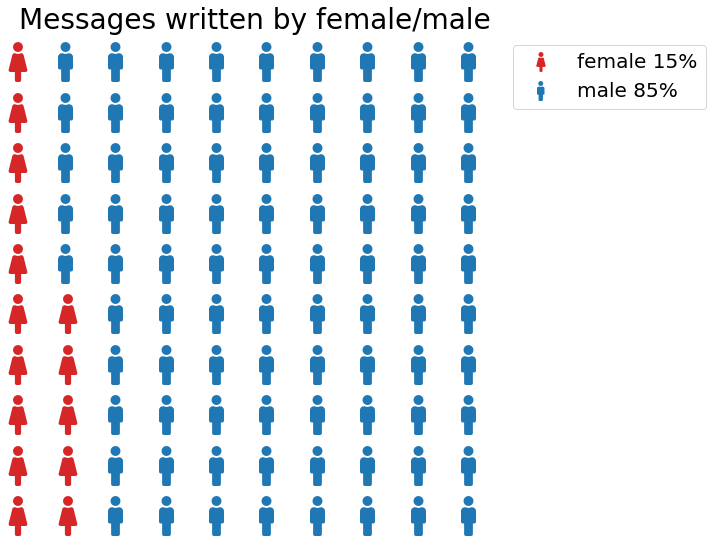

In [26]:
colors = ['tab:red', 'tab:blue']
data = {'female':g.item(0),'male':g.item(1)}
fig = plt.figure(figsize=(10, 12),
    FigureClass=Waffle, 
    rows=10, 
    values=data,
    labels = ["female"+" "+str(data.get('female'))+"%", "male"+" "+ str(data.get('male'))+ "%"],
    colors=colors,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), "fontsize": 20},
    icons=["female", "male"], icon_size=40, 
    icon_legend=True,
    title = {"label": "Messages written by female/male", "loc": "center", "fontsize": 28})

## What's interesting?
Boys are much more active in group chat. We can suppose that boys are more extraverted than girls

## 2.3 Comparing median messages' lengths

In [27]:
gend_m = prim_mes.copy()
gend_m['len'] = gend_m['message'].apply(lambda x: len(x))
gend_m =gend_m.groupby(['gender'],as_index = False)['len'].median()
gend_m

gender   len
0  female  14.0
1    male  15.0

Text(0.5, 1.0, 'median message length')

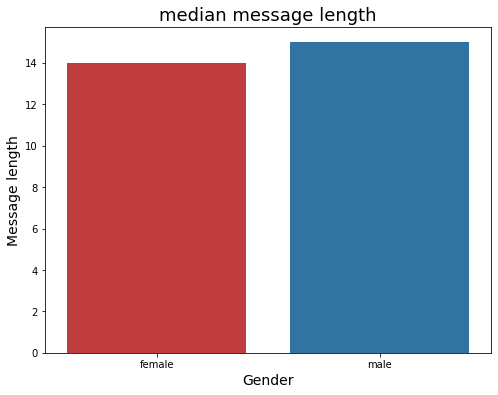

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x="gender", y="len", data=gend_m,
            palette=['tab:red', 'tab:blue'])
plt.ylabel("Message length", size=14)
plt.xlabel("Gender", size=14)
plt.title("median message length", size=18)

## What's interesting?
Surprizingly, median length is almost the same for either boys and girls

## 2.3.1 Let's see how median length was changing during chatting

Text(0.5, 0, 'date')

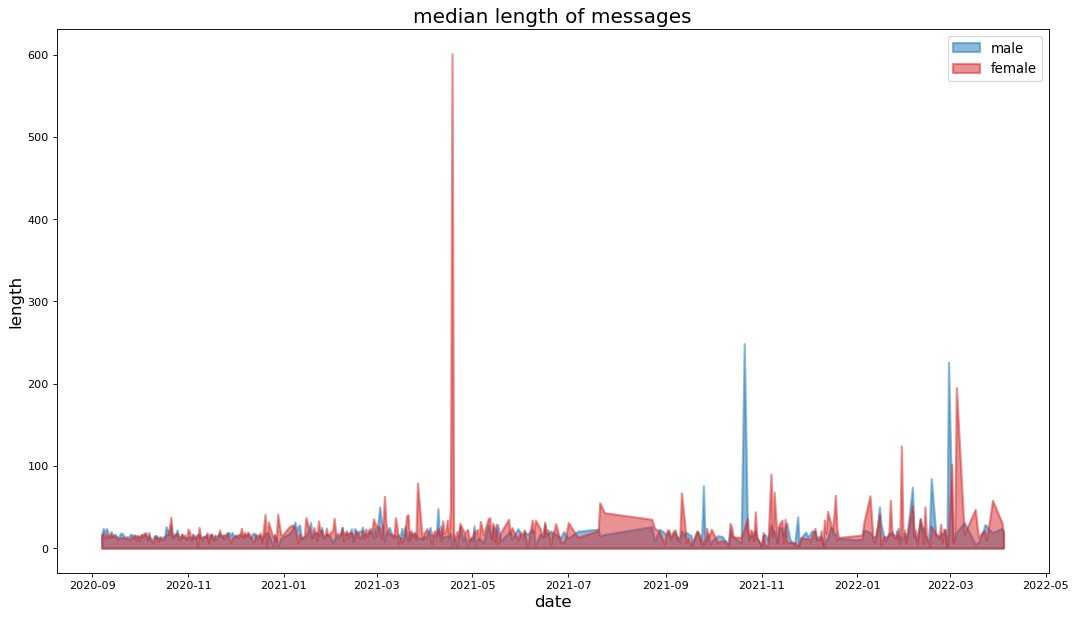

In [29]:
gend_m = prim_mes.copy()
gend_m['date'] = gend_m["date"].apply(lambda x: (datetime.fromisoformat(x[0:19])).date())
pr = gend_m.copy()
gend_m['len'] = gend_m['message'].apply(lambda x: len(x))
gend_m =gend_m.groupby(['gender','date'],as_index = False)['len'].median()
male = gend_m[gend_m['gender']=='male'][['date','len']]
female = gend_m[gend_m['gender']=='female'][['date','len']]
male = male.rename(columns = {'len': 'male'}, inplace = False)
female = female.rename(columns = {'len': 'female'}, inplace = False)
male = male.merge(female, on = 'date')

x = male['date'].values.tolist()
y1 = male['male'].values.tolist()
y2 = male['female'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['male', 'female']

fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[1], alpha=0.5, color=mycolors[0], linewidth=2)
ax.set_title('median length of messages', fontsize=18)
ax.legend(loc='best', fontsize=12)
ax.set_ylabel('length', fontsize = 15)
ax.set_xlabel('date', fontsize = 15)

# What's interesting?
We have most part of messages of about average length, and sometimes there are unusually long texts

## 2.3.2 Let 's see on days that are peaks on a graph

## Female top day

In [30]:
d = male.sort_values('female', ascending=False).head(1).iloc[0,0]
m = prim_mes[prim_mes['date'].str.contains(str(d), na = False)].sort_values('message', ascending=False)
for r in m['message'] :
    print('--',r)

-- ​Нам відомі моменти, коли одна людина змінювала хід історії. Знаємо про Александра Белла, читали про Алана Тюрінга, щось пам‘ятаємо про Олександра Флемінга, Марію Кюрі та Миколу Амосова.

А тепер уявіть, що в них було обмаль часу та багато вагань. Уявіть, якби в останній момент вони стали настільки не впевненими в своєму виборі, що світ ніколи не дізнався би про дива, на які здатен людський мозок. Уявили?

Подумайте й дайте собі відповідь на запитання: «Чому ваша маленька історія має залишатися без великих звершень?»

Ти можеш змінити історію навіть в останню секунду. Не пропусти цю можливість.
-- я
-- че за опрос
-- такое я люблю
-- пох
-- опа
-- но можно на печку нагнать
-- ладно
-- кому
-- до четверга
-- да.
-- Мені напишіть шо заповнили
-- :/


## Conclusion:
the anomaly caused by really small amount of messages and one extremely big

## Male top day

In [31]:
d = male.sort_values('male', ascending=False).head(2).iloc[0,0]
m = prim_mes[prim_mes['date'].str.contains(str(d), na = False)].sort_values('message', ascending=False)
for r in m['message'] :
    print('--',r)

-- Як проходить колок і Кр з матану?
-- Хороший вопрос
-- Відповідати на нього ми, звісно ж, не будем
-- Всім привіт
Допоможіть врятувати тата ❤️
Шукаю донорів крові для свого тата, Півторак Олександра. 
Він зараз бореться за життя в Олександрівській лікарні і потребує підсилення. Вірус ковіда сильно вдарив по його здоров’ю. 

Група крові будь-яка, бо в замін нам дадуть потрібну. Татові треба «3+», тому донори цієї крові особливо треба. 🙏🏻🙏🏻🙏🏻

📍м. Київ
Якщо хтось може стати донором 🩸прошу напишіть в мені в пп (@MetukaS)

Буду дуже вдячна за поширення🙏🏻


## Conclusion:
the same reason we have here

# #3. Most frequent words in group chat of primats


In [32]:
stop_words_ukr = {'а','то', 'аби', 'абиде', 'абиким', 'абикого', 'абиколи', 'абикому', 'абикуди', 'абихто', 'абичий', 'абичийого', 'абичийому', 'абичим', 'абичию', 'абичия', 'абичиє', 'абичиєму', 'абичиєю', 'абичиєї', 'абичиї', 'абичиїй', 'абичиїм', 'абичиїми', 'абичиїх', 'абичого', 'абичому', 'абищо', 'абияка', 'абияке', 'абиякий', 'абияким', 'абиякими', 'абияких', 'абиякого', 'абиякому', 'абиякою', 'абиякої', 'абияку', 'абиякі', 'абиякій', 'абиякім', 'або', 'абощо', 'нахуй','пізда','авжеж', 'авось', 'ага', 'ад', 'адже', 'аж', 'ажень', 'аз', 'ай', 'але', 'ало',"пиздец","хуйня","блядь", 'амінь', 'ант', 'ану', 'ані', 'аніде', 'аніж', 'анізащо', 'аніким', 'анікого', 'анікогісінько', 'аніколи', 'анікому', 'аніскільки', 'аніхто', 'анічим', 'анічого', 'анічогісінько', 'анічому', 'аніщо', 'аніяка', 'аніяке', 'аніякий', 'аніяким', 'аніякими', 'аніяких', 'аніякого', 'аніякому', 'аніякою', 'аніякої', 'аніяку', 'аніякі', 'аніякій', 'аніякім', 'аніякісенька', 'аніякісеньке', 'аніякісенький', 'аніякісеньким', 'аніякісенькими', 'аніякісеньких', 'аніякісенького', 'аніякісенькому', 'аніякісенькою', 'аніякісенької', 'аніякісеньку', 'аніякісенькі', 'аніякісенькій', 'аніякісенькім', 'аніякісінька', 'аніякісіньке', 'аніякісінький', 'аніякісіньким', 'аніякісінькими', 'аніякісіньких', 'аніякісінького', 'аніякісінькому', 'аніякісінькою', 'аніякісінької', 'аніякісіньку', 'аніякісінькі', 'аніякісінькій', 'аніякісінькім', 'ат', 'ато', 'атож', 'ау', 'ах', 'ач', 'ачей', 'аякже', 'б', 'ба', 'багато', 'багатьма', 'багатьом', 'багатьох', 'баз', 'бай', 'бат', 'бах', 'бац', 'баш', 'бе', 'беж', 'без', 'безперервно', 'бел', 'бер', 'би', 'бир', 'бич', 'близько', 'близько від', 'бо', 'бов', 'бод', 'бодай', 'боз', 'бош', 'був', 'буває', 'буде', 'будем', 'будемо', 'будете', 'будеш', 'буду', 'будуть', 'будь', 'будь ласка', 'будьмо', 'будьте', 'була', 'були', 'було', 'бути', 'бух', 'буц', 'буцім', 'буцімто', 'бі', 'біб', 'більш', 'більше', 'біля', 'в', 'в бік', 'в залежності від', 'в міру', 'в напрямі до', 'в порівнянні з', 'в процесі', 'в результаті', 'в ролі', 'в силу', 'в сторону', 'в супроводі', 'в ході', "в ім'я", 'в інтересах', 'вад', 'важлива', 'важливе', 'важливий', 'важливі', 'вак', 'вам', 'вами', 'ван', 'вас', 'ват', 'ваш', 'ваша', 'ваше', 'вашим', 'вашими', 'ваших', 'вашого', 'вашому', 'вашою', 'вашої', 'вашу', 'ваші', 'вашій', 'вашім', 'ввесь', 'вві', 'вгору', 'вдалині', 'вед', 'верх', 'весь', 'вех', 'вже', 'вздовж',"взагалі", 'ви', 'виз', 'вис', 'височині', 'вище ', 'вйо', 'власне', 'властиво', 'вміти', 'внаслідок', 'вниз', 'внизу', 'во', 'вон', 'вона', 'вони', 'воно', 'восьмий', 'вперед', 'вподовж', 'впоперек', 'впритиск', 'впритул', 'впродовж', 'впрост', 'все', 'всередині', 'всею', 'вслід', 'всупереч', 'всього', 'всьому', 'всю', 'всюди', 'вся', 'всяк', 'всяка', 'всяке', 'всякий', 'всяким', 'всякими', 'всяких', 'всякого', 'всякому', 'всякою', 'всякої', 'всяку', 'всякі', 'всякій', 'всякім', 'всі', 'всій', 'всіляка', 'всіляке', 'всілякий', 'всіляким', 'всілякими', 'всіляких', 'всілякого', 'всілякому',"ебать", 'нахуя','єбать','нихуя','пизда','всілякою','піздєц',
                  'всілякої', 'всіляку', 'всілякі', 'всілякій', 'всілякім', 'всім', 'всіма', 'всіх', 'всією', 'всієї', 'втім', 'ві', 'віг', 'від', 'від імені', 'віддалік від', 'відколи', 'відносно', 'відповідно', 'відповідно до', 'відсотків', 'відтепер', 'відтоді', 'він', 'вісім', 'вісімнадцятий', 'вісімнадцять', 'віт', 'віф', 'віх', 'віц', 'віщо', 'віщось', 'г', 'га', 'гав', 'гаразд', 'ге', 'гез', 'гем', 'геп', 'гет', 'геть', 'гех', 'ги', 'гик', 'гир', 'гич', 'гм', 'го', 'говорив', 'гог', 'гоп', 'гоц', 'гу', 'гуп', 'д', 'да', 'давай', 'давати', 'давно', 'далеко', 'далеко від', 'далі', 'даром', 'два', 'двадцятий', 'двадцять', 'дванадцятий', 'дванадцять', 'двох', 'дві', 'де', "дев'ятий", "дев'ятнадцятий", "дев'ятнадцять", "дев'ять", 'дедалі','ебать ', 'деким', 'декого', 'деколи',"пздц", 'декому', 'декотра', 'декотре', 'декотрий', 'декотрим', 'декотрими', 'декотрих', 'декотрого', 'декотрому', 'декотрою', 'декотрої', 'декотру', 'декотрі', 'декотрій', 'декотрім', 'декілька', 'декільком', 'декількома', 'декількох', 'декім', 'десь', 'десятий', 'десять', 'дехто', 'дечий', 'дечийого', 'дечийому', 'дечим', 'дечию', 'дечия', 'дечиє', 'дечиєму', 'дечиєю', 'дечиєї', 'дечиї', 'дечиїй', 'дечиїм', 'дечиїми', 'дечиїх', 'дечого', 'дечому', 'дечім', 'дещо', 'деяка', 'деяке', 'деякий', 'деяким', 'деякими', 'деяких', 'деякого', 'деякому', 'деякою', 'деякої', 'деяку', 'деякі', 'деякій', 'деякім', 'деінде', 'для', 'до', 'добре', 'довго', 'довкола', 'довкіл', 'дог', 'доки', 'допоки', 'допіру', 'досить', 'досі', 'дотепер', 'доти', 'другий', 'друго', 'дуже', 'дякую', 'дійсно', 'діл', 'е', 'еге', 'еж', 'ей', 'ерг', 'ест', 'ет', 'ех', 'еч', 'ж', 'же', 'жоден', 'жодна', 'жодне', 'жодний', 'жодним', 'жодними', 'жодних', 'жодного', 'жодному', 'жодною', 'жодної', 'жодну', 'жодні', 'жодній', 'жоднім', 'жоднісінька', 'жоднісіньке', 'жоднісінький', 'жоднісіньким', 'жоднісінькими', 'жоднісіньких', 'жоднісінького', 'жоднісінькому', 'жоднісінькою', 'жоднісінької', 'жоднісіньку', 'жоднісінькі', 'жоднісінькій', 'жоднісінькім', 'жуз', 'з', 'з метою', 'з нагоди', 'з приводу', 'з розрахунку на', 'з-за', 'з-над', 'з-перед', 'з-поза', 'з-поміж', 'з-понад', 'з-поперед', 'з-посеред', 'з-проміж', 'з-під', 'з-серед', 'за', 'за винятком', 'за допомогою', 'за посередництвом', 'за рахунок', 'завгодно', 'завдяки', 'завжди', 'завше', 'задля', 'зазвичай', 'зайнята', 'зайнятий', 'зайнято', 'зайняті', 'залежно', 'залежно від', 'замість', 'занадто', 'заради', 'зараз', 'зас', 'зате', 'збоку', 'збоку від', 'зважаючи на', 'зверх ', 'зверху', 'звичайно', 'звиш', 'звідки', 'звідкилясь', 'звідкись', 'звідкіль', 'звідкіля', 'звідкілясь', 'звідси', 'звідсіль', 'звідсіля', 'звідти', 'звідтіль', 'звідтіля', 'звідусюди', 'звідусіль', 'звідціля', 'згідно з', 'здається', 'здовж', 'зем', 'зет', 'ззаду', 'зиз', 'зик', 'значить', 'знову', 'зо', 'зовсім', 'зсередини', 'зух', 'зі', 'зіс', 'и', 'ич', 'й', 'ймовірно', 'йно', 'йо', 'його', 'йой', 'йол', 'йому', 'йор', 'йот', 'йох', 'к', 'каже', 'каз', 'кар', 'каф', 'ках', 'ке', 'кед', 'кет', 'кеш', 'кив', 'кий', 'кил', 'ким', 'кимось', 'кимсь', 'ких', 'киш', 'коб', 'коби', 'кого', 'когось', 'кожен', 'кожна', 'кожне', 'кожний', 'кожним', 'кожними', 'кожних', 'кожного', 'кожному', 'кожною', 'кожної', 'кожну', 'кожні', 'кожній', 'кожнім', 'кожнісінька', 'кожнісіньке', 'кожнісінький', 'кожнісіньким', 'кожнісінькими', 'кожнісіньких', 'кожнісінького', 'кожнісінькому', 'кожнісінькою', 'кожнісінької', 'кожнісіньку', 'кожнісінькі', 'кожнісінькій', 'кожнісінькім', 'коли', 'колись', 'коло', 'кому', 'комусь', 'котра', 'котрась', 'котре', 'котресь', 'котрий', 'котрийсь', 'котрим', 'котрими', 'котримись', 'котримось', 'котримсь', 'котрих', 'котрихось', 'котрихсь', 'котрого', 'котрогось', 'котрому', 'котромусь', 'котрою', 'котроюсь', 'котрої', 'котроїсь', 'котру', 'котрусь', 'котрі', 'котрій', 'котрійсь', 'котрім', 'котрімсь', 'котрісь', 'коц', 'коч', 'коштом', 'край', 'краще', 'кру', 'круг', 'кругом', 'крю', 'кря', 'крізь', 'крім', 'куди', 'кудись', 'кудою', 'кілька', 'кільком', 'кількома', 'кількох', 'кім', 'кімось', 'кімсь', 'кінець', 'л', 'лаж', 'лап', 'лас', 'лат', 'ле', 'ледве', 'ледь', 'лет', 'лиш', 'лише', 'лишень', 'лум', 'луп', 'лут', 'льє', 'люди', 'людина', 'ля', 'лі', 'ліворуч від', 'лік', 'лім', 'м', 'мабуть', 'майже', 'мало', 'мати', 'мац', 'ме', 'меж', 'мене', 'менше', 'мені', 'мерсі', 'мет', 'мжа', 'ми', 'мимо ', 'миру', 'мит', 'мною', 'мо', 'мов', 'мовби', 'мовбито', 'могла', 'могли', 'могло', 'мого', 'могти', 'мож', 'може', 'можем', 'можемо', 'можете', 'можеш', 'можна', 'можу','дохуя','хуйню','хуйня','піздец', 'можуть', 'можіть', 'мой', 'мол', 'мою', 'моя', 'моє', 'моєму', 'моєю', 'моєї', 'мої', 'моїй', 'моїм', 'моїми', 'моїх', 'му', 'мі', 'міг', 'між', 'мій', 'мільйонів', 'н', 'на', 'на адресу', 'на базі', 'на благо', 'на випадок', 'на відміну від', 'на засадах', 'на знак', 'на зразок', 'на користь', 'на кшталт', 'на межі', 'на основі', 'на противагу', 'на підставі', 'на честь', 'на чолі', 'на ґрунті', 'навколо', 'навкруг', 'навкруги ', 'навкіл', 'навпаки', 'навперейми', 'навпроти', 'навіть', 'навіщо', 'навіщось', 'нагорі', 'над', 'надо', 'надовкола', 'надокола', 'наді', 'назавжди', 'назад', 'назустріч', 'най', 'найбільш', 'нам', 'нами', 'наоколо ', 'наокруг ', 'наокруги ', 'наокіл', 'наперед', 'напередодні', 'напереді', 'наперекір', 'напереріз', 'наприкінці', 'напроти', 'нарешті', 'нарівні з', 'нас', 'насеред', 'насподі', 'наспід', 'настрічу', 'насупроти', 'насупротив ', 'нате', 'наче', 'начеб', 'начебто', 'наш', 'наша', 'наше', 'нашим', 'нашими', 'наших', 'нашого', 'нашому', 'нашою', 'нашої', 'нашу', 'наші', 'нашій', 'нашім', 'не', 'не до', 'не можна', 'неабичим', 'неабичого', 'неабичому', 'неабищо', 'небагато', 'небагатьма', 'небагатьом', 'небагатьох', 'небудь', 'невважаючи', 'невже', 'недалеко', 'недалеко від', 'неж', 'незалежно від', 'незважаючи', 'незважаючи на', 'ней', 'немає', 'немов', 'немовби', 'немовбито', 'неначе', 'неначебто', 'неподалеку', 'неподалеку від', 'неподалечку', 'неподалечку від', 'неподалік', 'неподалік від', 'нерідко', 'нех', 'нехай', 'нещодавно', 'нею', 'неї', 'нижче', 'низько', 'ник', 'ним', 'ними', 'них', 'нич', 'но', 'ну', 'нуг', 'нуд', 'нум', 'нумо', 'нумте', 'ньо', 'нього', 'ньому', 'ню', 'нюх', 'ня', 'няв', 'ні', 'ніби', 'ніби-то', 'нібито', 'ніде', 'ніж', 'нізащо', 'нізвідки', 'нізвідкіля', 'ній', 'ніким', 'нікого', 'нікогісінько', 'ніколи', 'нікому', 'нікотра', 'нікотре', 'нікотрий', 'нікотрим', 'нікотрими', 'нікотрих', 'нікотрого', 'нікотрому', 'нікотрою', 'нікотрої', 'нікотру', 'нікотрі', 'нікотрій', 'нікотрім', 'нікуди', 'нім', 'нінащо', 'ніскільки', 'ніт', 'ніхто', 'нічий', 'нічийна', 'нічийне', 'нічийний', 'нічийним', 'нічийними', 'нічийних', 'нічийного', 'нічийному', 'нічийною', 'нічийної', 'нічийну', 'нічийні', 'нічийній', 'нічийнім', 'нічийого', 'нічийому', 'нічим', 'нічию', 'нічия', 'нічиє', 'нічиєму', 'нічиєю', 'нічиєї', 'нічиї', 'нічиїй', 'нічиїм', 'нічиїми', 'нічиїх', 'нічого', 'нічому', 'ніщо', 'ніяк', 'ніяка', 'ніяке', 'ніякий', 'ніяким', 'ніякими', 'ніяких', 'ніякого', 'ніякому', 'ніякою', 'ніякої', 'ніяку', 'ніякі', 'ніякій', 'ніякім', 'ніякісінька', 'ніякісіньке', 'ніякісінький', 'ніякісіньким', 'ніякісінькими', 'ніякісіньких', 'ніякісінького', 'ніякісінькому', 'ніякісінькою', 'ніякісінької', 'ніякісіньку', 'ніякісінькі', 'ніякісінькій', 'ніякісінькім', 'о', 'об', 'обабіч', 'обаполи', 'обидва', 'обр', 'обік', 'обіруч', 'обіч', 'ов', 'од', 'один', 'одинадцятий', 'одинадцять', 'одна', 'однак', 'одначе', 'одне', 'одним', 'одними', 'одних', 'одно', 'одного', 'одного разу', 'одному', 'одною', 'одної', 'одну', 'одні', 'одній', 'однім', 'однією', 'однієї', 'ож', 'ой', 'окрай', 'окроме', 'округ', 'округи', 'окрім', 'окіл', 'ом', 'он', 'онде', 'онно', 'оно', 'оподаль', 'оподаль від', 'оподалік', 'оподалік від', 'опостін', 'опостінь', 'опроче', 'опріч', 'опріче', 'опісля', 'осе', 'оскільки', 'особливо', 'осторонь', 'ось', 'осісьо', 'от', 'ота', 'отак', 'отака', 'отаке', 'отакий', 'отаким', 'отакими', 'отаких', 'отакого', 'отакому', 'отакою', 'отакої', 'отаку', 'отакі', 'отакій', 'отакім', 'отакісінька', 'отакісіньке', 'отакісінький', 'отакісіньким', 'отакісінькими', 'отакісіньких', 'отакісінького', 'отакісінькому', 'отакісінькою', 'отакісінької', 'отакісіньку', 'отакісінькі', 'отакісінькій', 'отакісінькім', 'отам', 'оте', 'отже', 'отим', 'отими', 'отих', 'ото', 'отого', 'отож', 'отой', 'отому', 'отою', 'отої', 'отсе', 'оттак', 'отто', 'оту', 'отут', 'оті', 'отій', 'отім', 'отією', 'отієї', 'ох', 'оце', 'оцей', 'оцим', 'оцими', 'оцих', 'оцього', 'оцьому', 'оцю', 'оця', 'оці', 'оцій', 'оцім', 'оцією', 'оцієї', 'п', "п'я", "п'ятий", "п'ятнадцятий", "п'ятнадцять", "п'ять", 'па', 'пад', 'пак', 'пек', 'перед', 'передо', 'переді', 'перетака', 'перетаке', 'перетакий', 'перетаким', 'перетакими', 'перетаких', 'перетакого', 'перетакому', 'перетакою', 'перетакої', 'перетаку', 'перетакі', 'перетакій', 'перетакім', 'перший', 'пиж', 'плі', 'по', 'поблизу', 'побік', 'побіля', 'побіч', 'поверх', 'повз', 'повздовж', 'повинно', 'повище', 'повсюди', 'повсюдно', 'подаль від', 'подалі від', 'подекуди', 'подеяка', 'подеяке', 'подеякий', 'подеяким', 'подеякими', 'подеяких', 'подеякого', 'подеякому', 'подеякою', 'подеякої', 'подеяку', 'подеякі', 'подеякій', 'подеякім', 'подовж', 'подібно до', 'поз', 'поза', 'позад', 'позаду', 'позата', 'позате', 'позатим', 'позатими', 'позатих', 'позатого', 'позатой', 'позатому', 'позатою', 'позатої', 'позату', 'позаті', 'позатій', 'позатім', 'позатією', 'позатієї', 'позаяк', 'поздовж', 'поки', 'покрай', 'покіль', 'помежи', 'помимо', 'поміж', 'помість', 'понад', 'понадо', 'понаді', 'понижче', 'пообіч', 'поодаль від', 'поодалік від', 'поперед', 'попереду', 'поперек', 'попліч', 'попри', 'попросту', 'попід', 'пора', 'поруч', 'поряд', 'поряд з', 'порівняно з', 'посеред', 'посередині', 'потрібно', 'потім', 'поуз', 'початку', 'почерез', 'праворуч від', 'пред', 'предо', 'преді', 'прекрасно', 'прецінь', 'при', 'притому', 'причому', 'причім', 'про', 'проз', 'промеж', 'проміж', 'просто'
                  , 'проте', 'проти', 'против', 'противно', 'протягом', 'пря', 'пріч', 'пхе', 'пху', 'пі', 'пів', 'півперек', 'під', 'під знаком', 'під приводом', 'під час', 'підо', 'пізніше', 'пім', 'пір', 'після', 'р', 'ради', 'раз', 'разом з', 'разу', 'рано', 'раніш', 'раніш від', 'раніше', 'раніше від', 'раптом', 'ре', 'рет', 'риж', 'рим', 'рип', 'роб', 'року', 'років', 'рос', 'рох', 'році', 'рус', 'рух', 'руч', 'рік', 'с', 'саж', 'саз', 'сак', 'сам', 'сама', 'саме', 'сами', 'самий', 'самим', 'самими', 'самих', 'само', 'самого', 'самому', 'самою', 'самої', 'саму', 'самі', 'самій', 'самім', 'сап', 'сас', 'свого', 'свою', 'своя', 'своє', 'своєму', 'своєю', 'своєї', 'свої', 'своїй', 'своїм', 'своїми', 'своїх', 'свій', 'се', 'себе', 'себто', 'сей', 'сен', 'серед', 'середи', 'середу', 'сеч', 'си', 'сив', 'сиг', 'сиз', 'сик', 'сиріч', 'сих', 'сказав', 'сказала', 'сказати', 'скрізь', 'скільки', 'скільки-то', 'скількись', 'скільком', 'скількома', 'скількомась', 'скількомось', 'скількомсь', 'скількох', 'скількохось', 'скількохсь', 'сли', 'слідом за', 'соб', 'собою', 'собі', 'соп', 'спасибі', 'спереду', 'спочатку', 'справ', 'справді', 'став', 'стосовно', 'стільки', 'стільком', 'стількома', 'стількох', 'су', 'судячи з', 'супроти', 'супротив', 'суть', 'суч', 'суш', 'сьогодні', 'сьомий', 'сюди', 'ся', 'сяг', 'сяк', 'сяка', 'сяке', 'сякий', 'сяким', 'сякими', 'сяких', 'сякого', 'сякому', 'сякою', 'сякої', 'сяку', 'сякі', 'сякій', 'сякім', 'сям', 'сі', 'сім', 'сімнадцятий', 'сімнадцять', 'сіп', 'т', 'та', 'таж', 'так', 'така', 'таке', 'такенна', 'такенне', 'такенний', 'такенним', 'такенними', 'такенних', 'такенного', 'такенному', 'такенною', 'такенної', 'такенну', 'такенні', 'такенній', 'такеннім', 'таки', 'такий', 'таким', 'такими', 'таких', 'такого', 'також', 'такому', 'такою', 'такої', 'таку', 'такі', 'такій', 'такім', 'такісінька', 'такісіньке', 'такісінький', 'такісіньким', 'такісінькими', 'такісіньких', 'такісінького', 'такісінькому', 'такісінькою', 'такісінької', 'такісіньку', 'такісінькі', 'такісінькій', 'такісінькім', 'тал', 'там', 'тамки', 'тамта', 'тамте', 'тамтим', 'тамтими', 'тамтих', 'тамтого', 'тамтой', 'тамтому', 'тамтою', 'тамтої', 'тамту', 'тамті', 'тамтій', 'тамтім', 'тамтією', 'тамтієї', 'тар', 'тат', 'таш', 'тва', 'твого', 'твою', 'твоя', 'твоє', 'твоєму', 'твоєю', 'твоєї', 'твої', 'твоїй', 'твоїм', 'твоїми', 'твоїх', 'твій', 'те', 'тебе', 'тег', 'теж', 'тем', 'тепер', 'теперечки', 'тес', 'теф', 'теє', 'ти', 'тик', 'тил', 'тим', 'тими', 'тисяч', 'тих', 'то', 'тобою', 'тобто', 'тобі', 'того', 'тоді', 'тож', 'той', 'тол', 'тому', 'тому що', 'тот', 'тощо', 'тою', 'тої', 'тра', 'тре', 'треба', 'третій', 'три', 'тринадцятий', 'тринадцять', 'трохи', 'тс', 'тсс', 'ту', 'туди', 'тудою', 'туп', 'тут', 'тутеньки', 'тутечки', 'тутки', 'туф', 'туц', 'тю', 'тюг', 'тюп', 'тяг', 'тяж', 'тям', 'тяп', 'ті', 'тій', 'тільки', 'тім', 'тією', 'у', 'у бік', 'у вигляді', 'у випадку', 'у відповідності до', 'у відповідь на', 'у залежності від', "у зв'язку з", 'у міру', 'у напрямі до', 'у порівнянні з', 'у процесі', 'у результаті', 'у ролі', 'у силу', 'у сторону', 'у супроводі', 'у ході', 'ув', 'увесь', 'уві', 'угу', 'уже', 'узбіч', 'уздовж', 'укр', 'ум', 'унаслідок', 'униз', 'унизу', 'унт', 'уперед', 'уподовж', 'упоперек', 'упритиск до', 'упритул до', 'упродовж', 'упрост', 'ус', 'усе', 'усередині', 'услід', 'услід за', 'усупереч', 'усього', 'усьому', 'усю', 'усюди', 'уся', 'усяк', 'усяка', 'усяке', 'усякий', 'усяким', 'усякими', 'усяких', 'усякого', 'усякому', 'усякою', 'усякої', 'усяку', 'усякі', 'усякій', 'усякім', 'усі', 'усій', 'усіляка', 'усіляке', 'усілякий', 'усіляким', 'усілякими', 'усіляких', 'усілякого', 'усілякому', 'усілякою', 'усілякої', 'усіляку', 'усілякі', 'усілякій', 'усілякім', 'усім', 'усіма', 'усіх', 'усією', 'усієї', 'утім', 'ух', 'ф', "ф'ю", 'фа', 'фаг', 'фай', 'фат', 'фе', 'фед', 'фез', 'фес', 'фет', 'фзн', 'фоб', 'фот', 'фра', 'фру', 'фу', 'фук', 'фур', 'фус', 'фіш', 'х', 'ха', 'хаз', 'хай', 'хап', 'хат', 'хащ', 'хе', 'хет', 'хи', 'хиб', 'хм', 'хо', 'хов', 'хол', 'хон', 'хоп', 'хор', 'хотіти', 'хоч', 'хоча', 'хочеш', 'хро', 'хрю', 'хто', 'хтось', 'ху', 'хуз', 'хук', 'хух', 'хху', 'хіба', 'ц', 'це', 'цебто', 'цей', 'цеп', 'ци', 'цим', 'цими', 'цир', 'цих', 'цло', 'цоб', 'цок', 'цоп', 'цор', 'цс', 'цсс', 'цуг', 'цур', 'цуц', 'цього', 'цьому', 'цю', 'цюк', 'ця', 'цяв', 'цяп', 'ці', 'цід', 'цій', 'цім', 'ціною', 'цією', 'цієї', 'ч', 'чал', 'чар', 'час', 'часто', 'частіше', 'часу', 'чах', 'чей', 'чень', 'через', 'четвертий', 'чи', 'чий', 'чийого', 'чийогось', 'чийому', 'чийомусь', 'чийсь', 'чик', 'чим', 'чимось', 'чимсь', 'чир', 'численна', 'численне', 'численний', 'численним', 'численними', 'численних', 'численні', 'чию', 'чиюсь', 'чия', 'чиясь', 'чиє', 'чиєму', 'чиємусь', 'чиєсь', 'чиєю', 'чиєюсь', 'чиєї', 'чиєїсь', 'чиї', 'чиїй', 'чиїйсь', 'чиїм', 'чиїми', 'чиїмись', 'чиїмось', 'чиїмсь', 'чиїсь', 'чиїх', 'чиїхось', 'чиїхсь', 'чля', 'чого', 'чогось', 'чом', 'чому', 'чомусь', 'чон', 'чоп', 'чортзна', 'чос', 'чотири', 'чотирнадцятий', 'чотирнадцять', 'чу', 'чум', 'чур', 'чш', 'чім', 'чімось', 'чімсь', 'чіт', 'ш', 'ша', 'шаг', 'шал', 'шам', 'шво', 'шед', 'шен', 'шиз', 'шир', 'шляхом', 'шостий', 'шістнадцятий', 'шістнадцять', 'шість', 'щ', 'ще', 'щем', 'щеп', 'щип', 'щир', 'що', 'щоб', 'щоби', 'щодо', 'щойно', 'щоправда', 'щось', 'щі', 'ь', 'ю', 'юз', 'юн', 'юнь', 'юс', 'ют', 'юхт', 'я', 'яв', 'яд', 'яз', 'язь', 'як', 'яка', 'якась', 'якби', 'яке', 'якесь', 'який', 'якийсь', 'яким', 'якими', 'якимись', 'якимось', 'якимсь', 'яких', 'якихось', 'якихсь', 'якого', 'якогось', 'якому', 'якомусь', 'якось', 'якою', 'якоюсь', 'якої', 'якоїсь', 'якраз', 'яку', 'якусь', 'якщо', 'які', 'якій', 'якійсь', 'якім', 'якімсь', 'якісь', 'ял', 'ям', 'ян', 'янь', 'яо', 'яп', 'ярл', 'ясь', 'ять', 'є', 'єр', 'єси', 'і', 'ібн', 'ід', 'із', 'із-за', 'із-під', 'іззаду', 'ізм', 'ізсередини', 'ік', 'ікс', 'ікт', "ім'я", 'імовірно', 'інакша', 'інакше', 'інакший', 'інакшим', 'інакшими', 'інакших', 'інакшого', 'інакшому', 'інакшою', 'інакшої', 'інакшу', 'інакші', 'інакшій', 'інакшім', 'інколи', 'іноді', 'інша', 'інше', 'інший', 'іншим', 'іншими', 'інших', 'іншого', 'іншому', 'іншою', 'іншої', 'іншу', 'інші', 'іншій', 'іншім', 'інь', 'іч', 'іще', 'ї', 'їдь', 'їй', 'їм', 'їх', 'їхнього', 'їхньому', 'їхньою', 'їхньої', 'їхню', 'їхня', 'їхнє', 'їхні', 'їхній', 'їхнім', 'їхніми', 'їхніх', 'її', 'ґ','вроде',"вообще","вообще-то","кста",'блять','сука','кстати','типу','точно','прост',"похуй","такое","такой","что-то","кто-то","https"}

In [33]:
stop_words = set(stopwords.words("russian"))
stop_words.update(stop_words_ukr)

In [34]:
count = Counter()
for i in range(0,primat.shape[0]):
    corp = nltk.word_tokenize(primat.at[i])
    m = []
    for x in corp:
        if((len(x)>3) and (x.lower() not in stop_words)): 
            m.append(x.lower())
    count.update(m)
common = count.most_common(300)
text =''
for i in common:
    text+=i[0]+' '

In [35]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

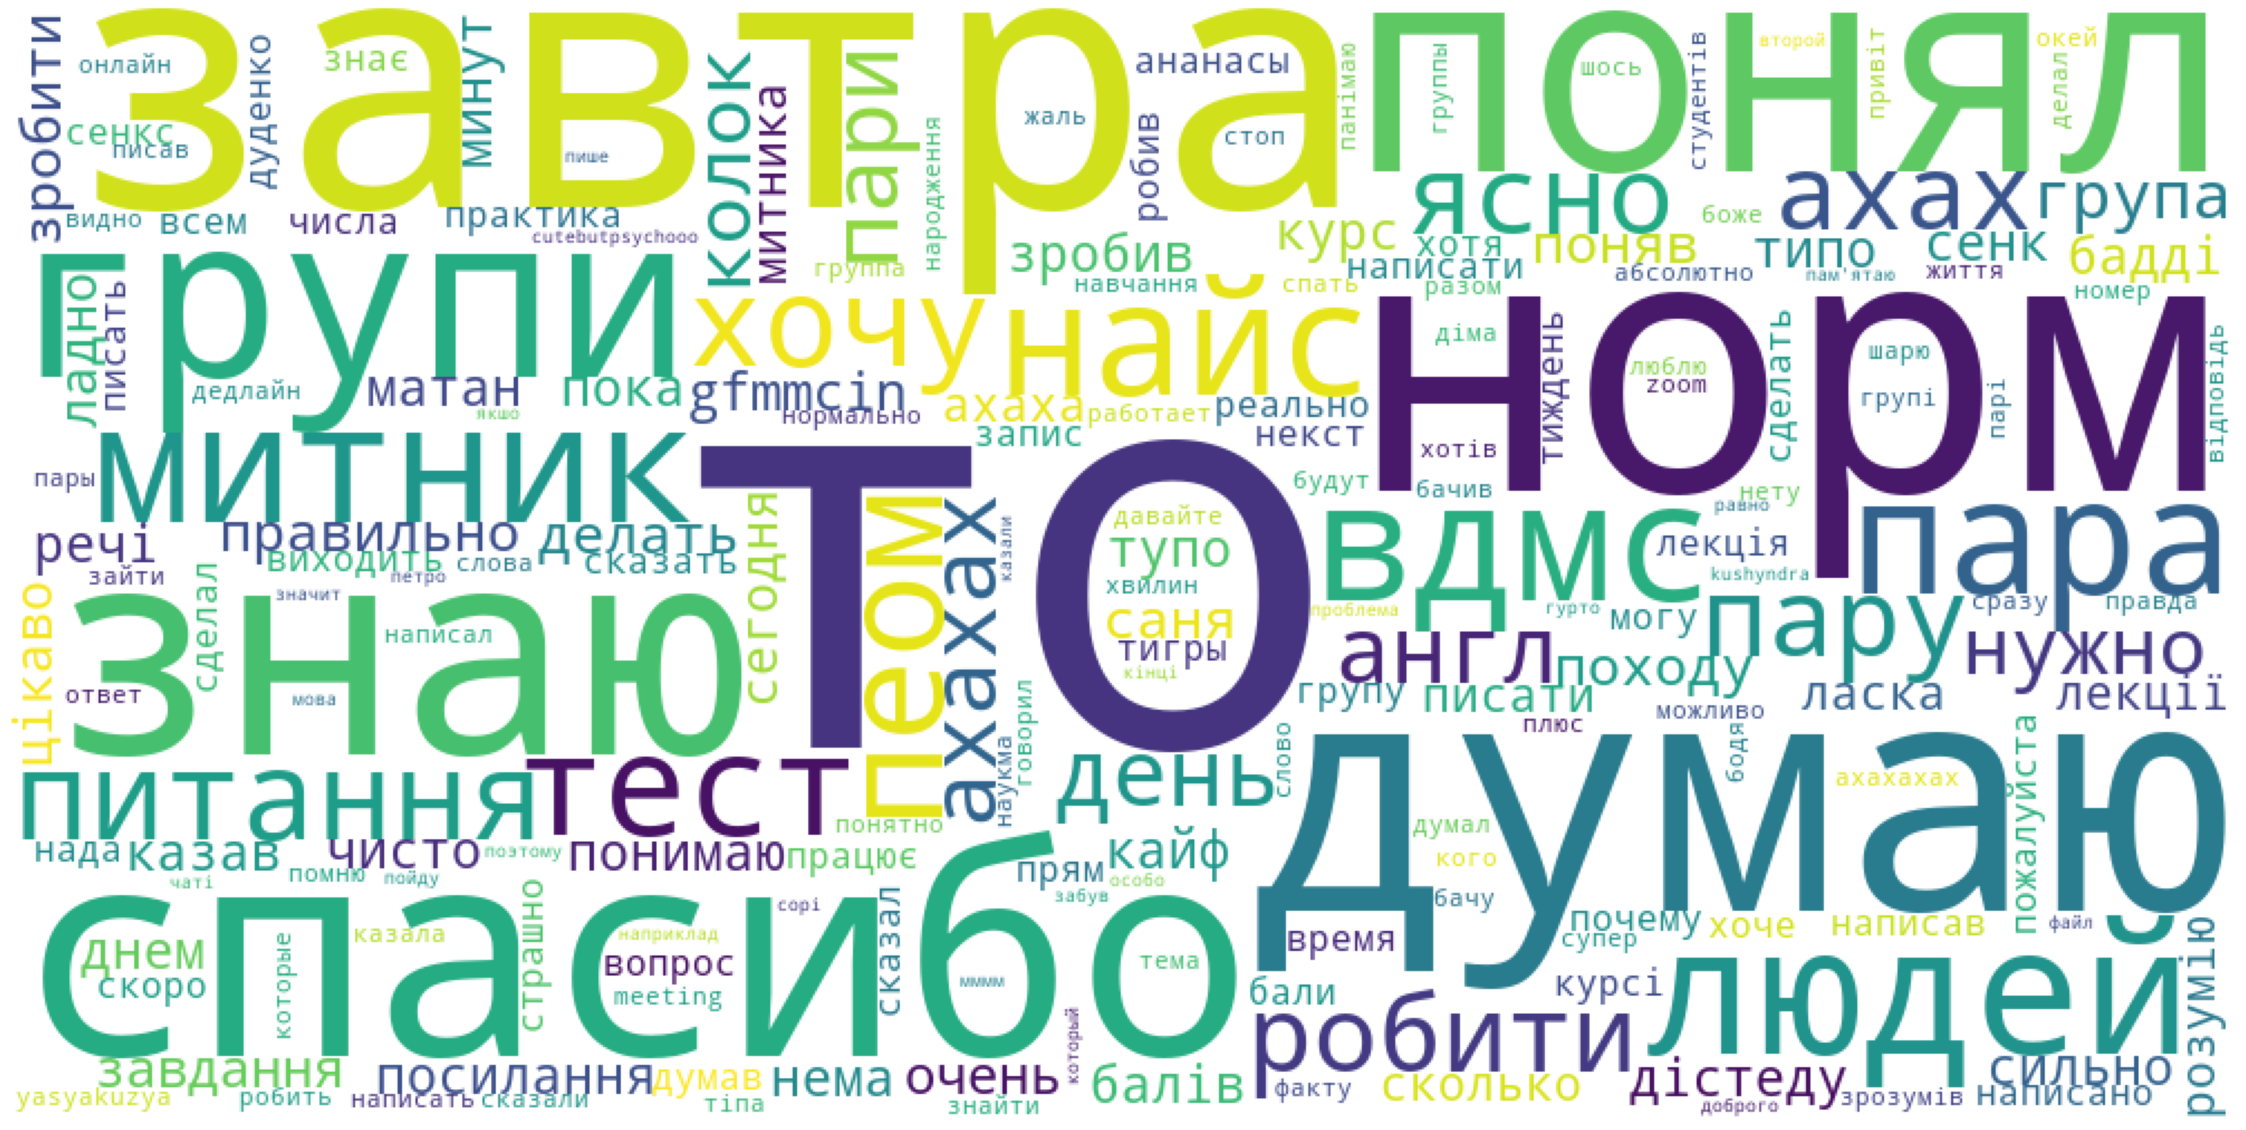

In [36]:
wordcloud = WordCloud(width = 1000, height = 500,  background_color='white', colormap='viridis', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

## What's interesting?
Most words are about studying. But also there are some surprising ones. For example: "тигры". I had no idea why is it among the most frequent ones, so I found messages with this word. I found out that there was a common joke, when people sent big messages with this word repeating



# ☑



# #4. Messages in Ukrainian VS Russian in most active chat I have





In [37]:
def message_lang(mes):
    for i in ukr_signs:
        if i in mes: return "ukr"
    for i in rus_signs:
        if i in mes: return "rus"
    return 'unknown'


In [38]:
ukr_signs = {'і','є','ї','шо','що',' з ','ння','добре','робити','будь ласка'," це ","ено "}
rus_signs = {'ы','ъ','ё',"тся",'если','что','делать',' с ',' из '}

In [39]:
bloto_id = prbl_meta[prbl_meta['name'].str.contains("блото бендер", na = False)].iloc[1,0]
bl_mes = prbl[(prbl['dialog_id'].str.contains(str(bloto_id), na = False))& (prbl['message'].notnull())]
bloto_mes =bl_mes[bl_mes['date'] <'2022-02-24 00:00:00'] ['message'].reset_index(drop = True)
ukr = 0
rus = 0
un = 0
for m in bloto_mes:
    s = message_lang(m.lower())
    if(s == 'ukr'): ukr += 1
    elif(s == 'rus'): rus += 1
    else: un += 1

## 4.1 Language in most active chat that I have before war


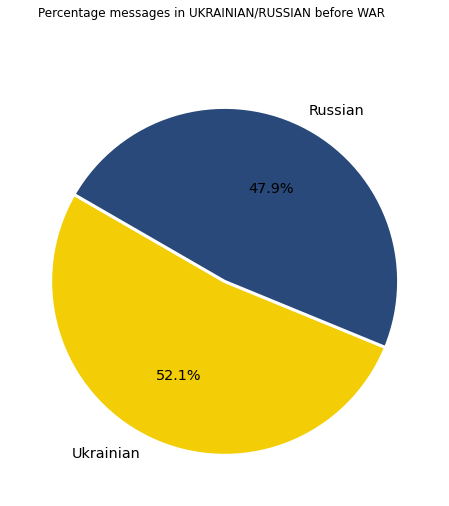

In [40]:
colors = ["#F3CD05", "#28497a"]
lang = pd.DataFrame({'mess': [ukr,rus]},index=['Ukrainian', 'Russian'])['mess'].plot.pie(subplots =True,colors = colors, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
        startangle=150, ylabel='', title="Percentage messages in UKRAINIAN/RUSSIAN before WAR",  figsize=(15, 8))

## What's interesting?
Ukrainian and Russian have almost the same parts of all messages.


## 4.2   Language in most active chat I have after war was started

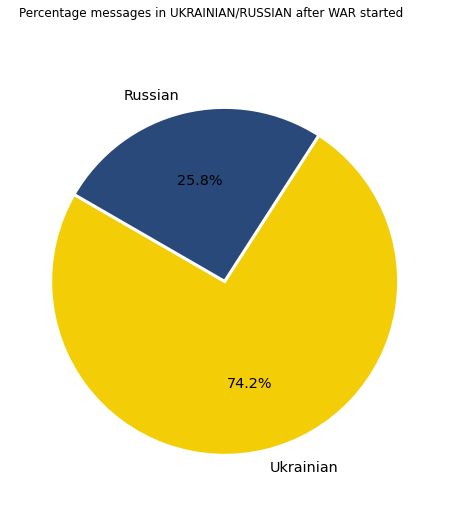

In [41]:
bloto_mes =bl_mes[bl_mes['date'] >'2022-02-24 00:00:00'] ['message'].reset_index(drop = True)
ukr = 0
rus = 0
un = 0
for m in bloto_mes:
    s = message_lang(m.lower())
    if(s == 'ukr'): ukr += 1
    elif(s == 'rus'): rus += 1
    else: un += 1
colors = ["#F3CD05", "#28497a"]
lang = pd.DataFrame({'mess': [ukr,rus]},index=['Ukrainian', 'Russian'])['mess'].plot.pie(subplots =True,colors = colors, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
        startangle=150, ylabel='', title="Percentage messages in UKRAINIAN/RUSSIAN after WAR started",  figsize=(15, 8))

## What's interesting?
We can see a quick increasing of Ukrainian language in chat

## But:
this result is really biased by messages forwarded from russian 'super real' news

##  4.3 Most common words in this chat after war was started


### Decided to find how our texts changed

In [42]:
nosense_words = {'россия','подписаться','❗️оперативные','фейков👇','новость✍🏼','киев|предложить','🇺🇦хуевый','//t.me/+ooq-g1l3oga3zjji','perepichka','канал','данные','подпишись','оперативные','предложить','новость','минобороны','передовой','ніхуя','россии','political.ua'}

In [43]:
count = Counter()
for i in range(0,bloto_mes.shape[0]):
    corp = nltk.word_tokenize( bloto_mes.at[i])
    m = []
    for x in corp:
        if((len(x)>3) and (x.lower() not in stop_words)): 
            if(x.lower() not in nosense_words):
                m.append(x.lower())
    count.update(m)
common = count.most_common(150)
text =''
for i in common:
    text+=i[0]+' '

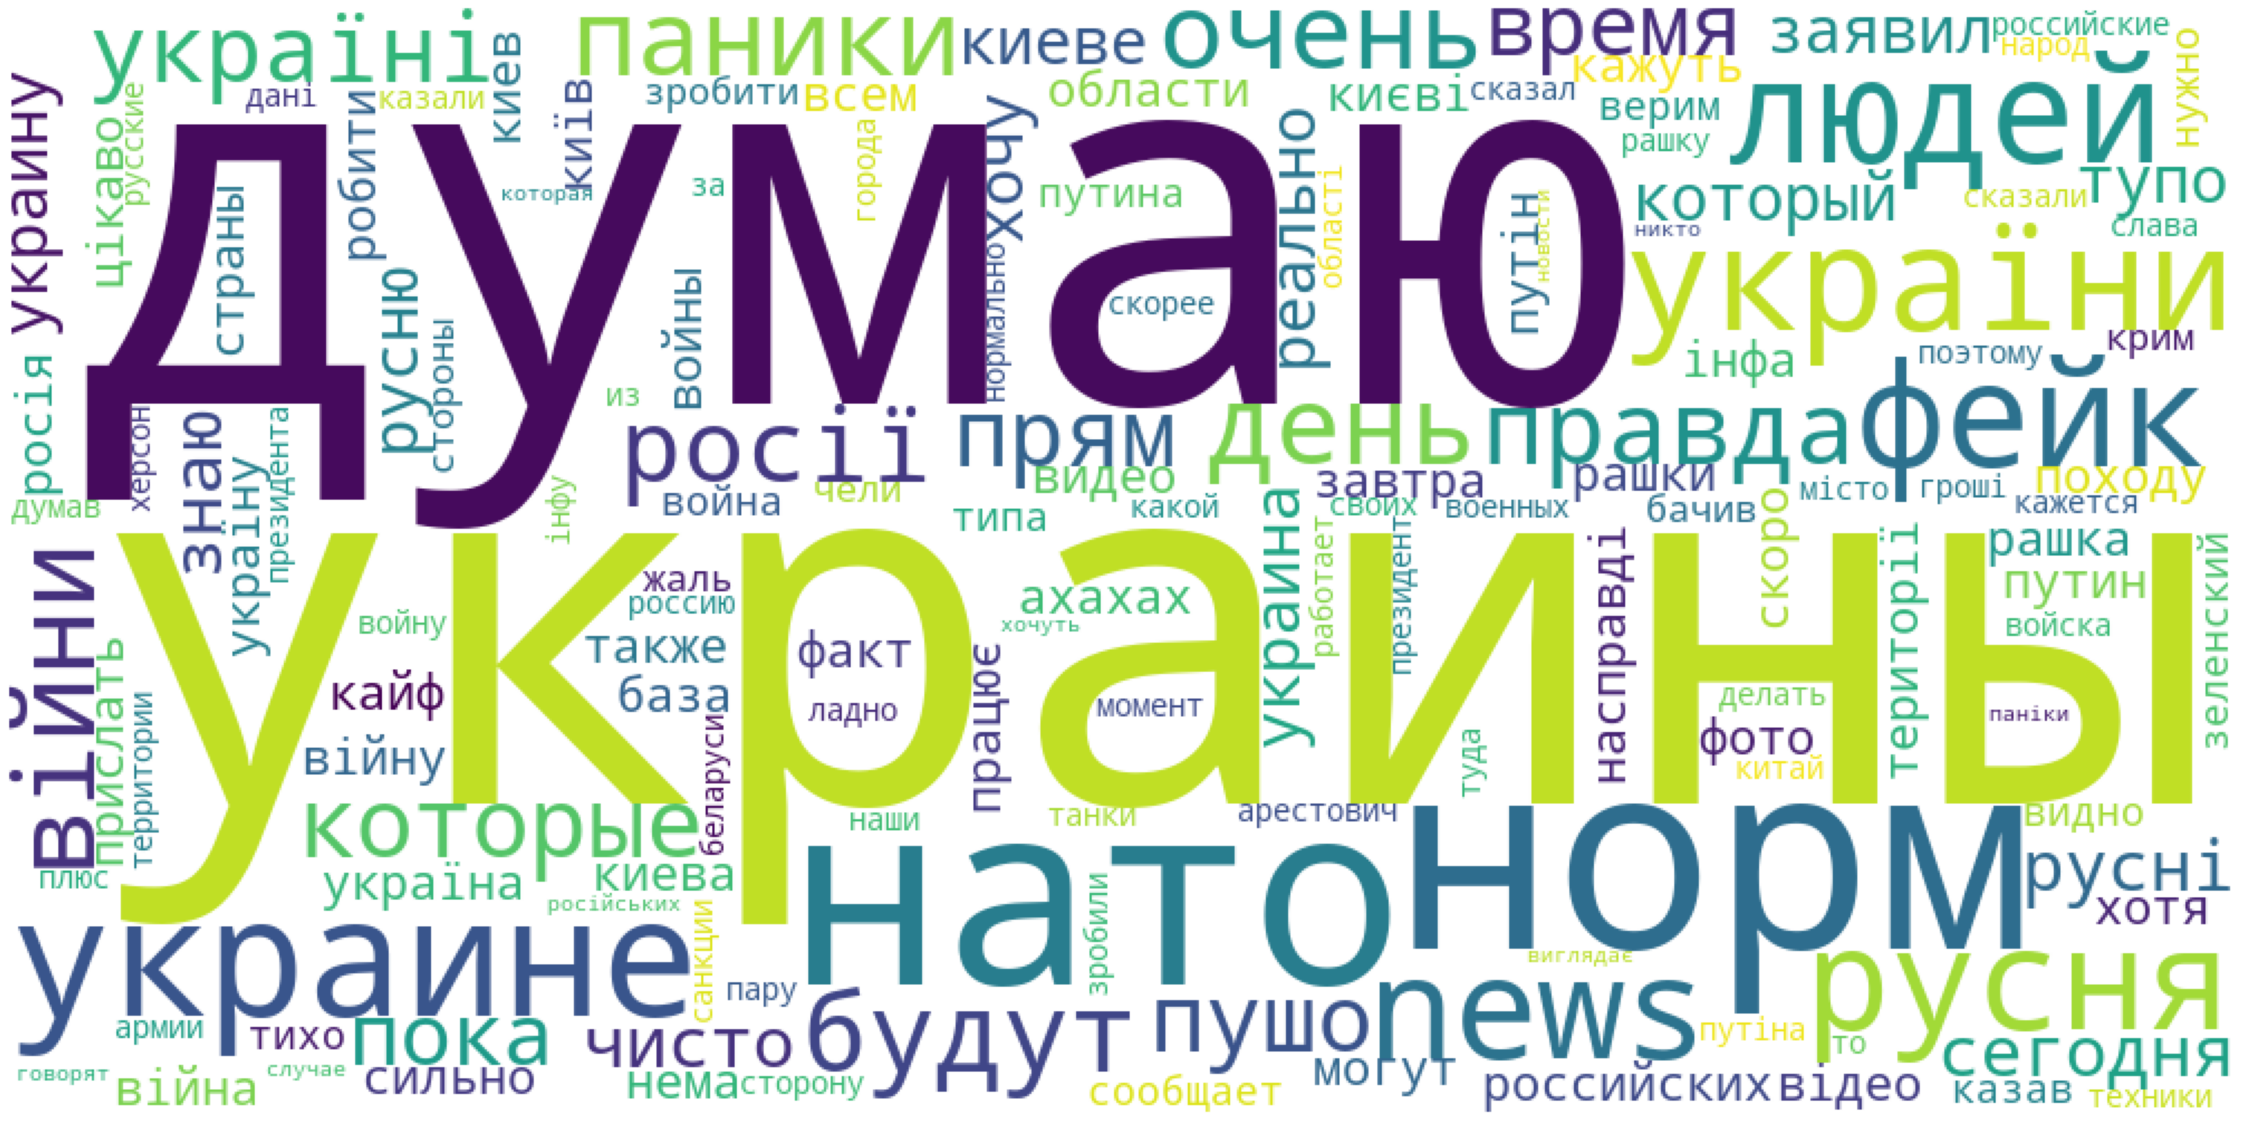

In [44]:
wordcloud = WordCloud(width = 1000, height = 500,  background_color='white', colormap='viridis', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

## What's interesting?
All words are about politics, this is the only topic that now discussed there

# ☑


# #5. Median amount of messages for weekdays in different months
### I analized main chat of primats(Applied mathematics). ( Data ends before war)

In [45]:
def get_correct(x):
    if(x > 8): return x%9;
    return x + 4;

In [46]:
primat_mes = df[(df['dialog_id'].str.contains(primat_id, na = False))]

In [47]:
days_month = primat_mes.copy()
days_month['date'] = days_month["date"].apply(lambda x: x.date())
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December']
days_month['month'] = days_month["date"].apply(lambda x: '('+str(x.month-3)+')' +month[x.month-1])
days_month['day of week'] =days_month["date"].apply(lambda x: '('+str(x.weekday())+')' + x.strftime('%A'))
days_month = days_month.groupby(['month','day of week','date'], as_index=False)["message"].count()
days_month = days_month.groupby(['month','day of week'], as_index=False)["message"].median()
days_month = days_month.pivot("month", "day of week", "message")


## 5.1  Month-Weekday median amount of messages

 ### I decided to look at most active weekdays and got very interesting result

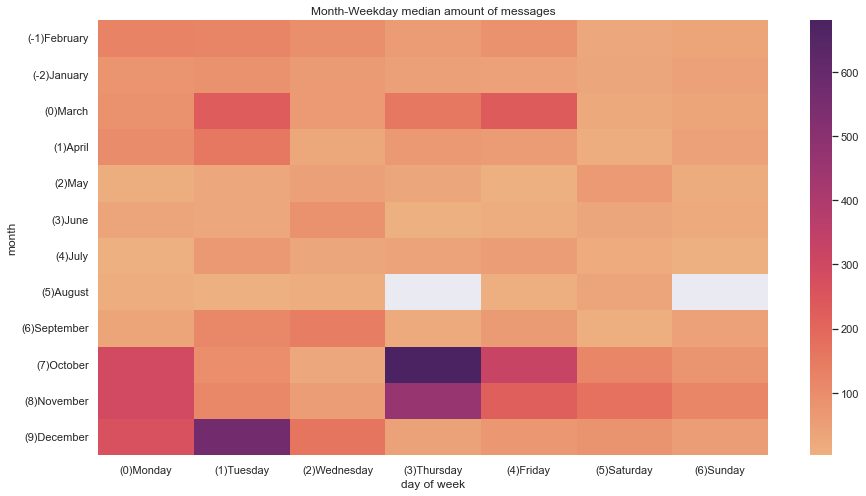

In [48]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(days_month, cmap="flare")
plt.title("Month-Weekday median amount of messages")
plt.show()

## What's interesting?
Surprisingly, there aren't any messages sent on Sundays and Thursdays in August. Why these days?

In [49]:
mess_primat_course2 = primat_mes[primat_mes['date']>'2021-09-01 00:00:00']
mess_primat_course2['date'] = mess_primat_course2["date"].apply(lambda x: x.date())
month = ['September','October','November','December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
mess_primat_course2['month'] = mess_primat_course2["date"].apply(lambda x: get_correct(x.month))
mess_primat_course2['month'] = mess_primat_course2["month"].apply(lambda x: '('+str(x-1)+')'+month[x])
mess_primat_course2['day of week'] =mess_primat_course2["date"].apply(lambda x: '('+str(x.weekday())+')' + x.strftime('%A'))
mess_primat_course2 = mess_primat_course2.groupby(['month','day of week','date'], as_index=False)["message"].count()
mess_primat_course2 = mess_primat_course2.groupby(['month','day of week'], as_index=False)["message"].median()
mess_primat_course2 = mess_primat_course2.pivot("month", "day of week", "message")


## 5.2 Month-Weekday median amount of messages during 2nd year at university

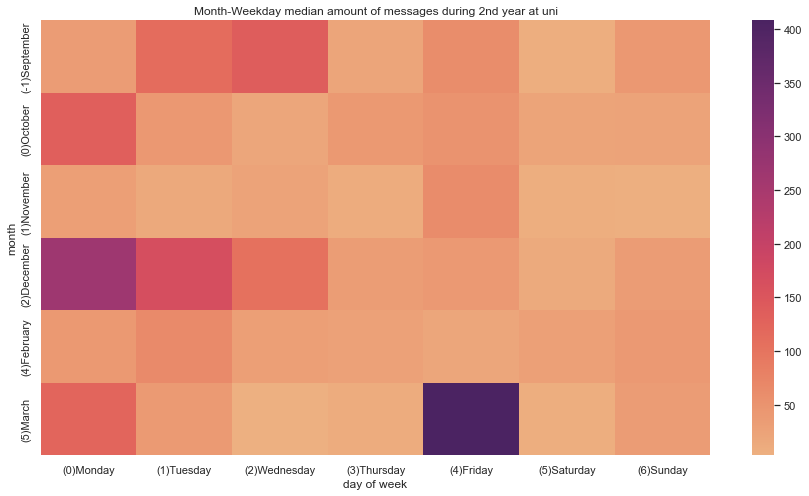

In [50]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(mess_primat_course2, cmap="flare")
plt.title("Month-Weekday median amount of messages during 2nd year at uni")
plt.show()

# What's interesting:

Most active days were Mondays in December and Fridays in March


## 5.3 Month-Weekday median amount of messages during 1st year at uni

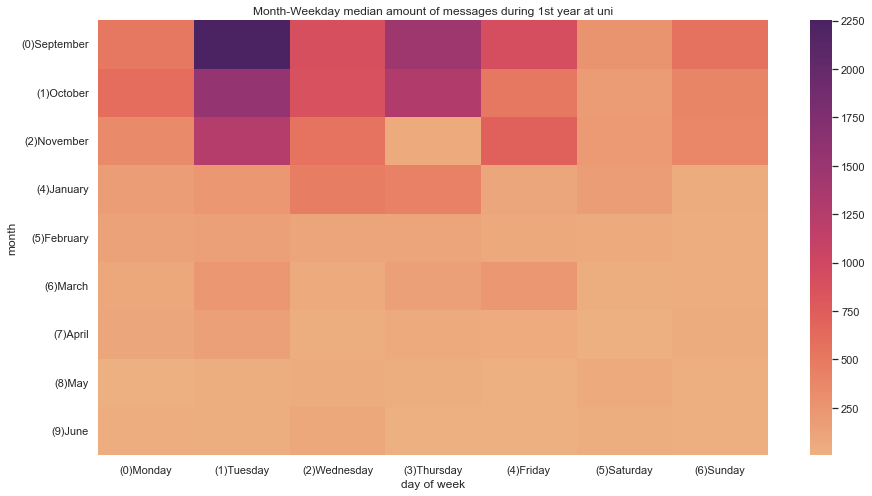

In [51]:
mess_primat_course1 = primat_mes[primat_mes['date']<'2021-07-01 00:00:00']
mess_primat_course1['date'] = mess_primat_course1["date"].apply(lambda x: x.date())
month = ['September','October','November','December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
mess_primat_course1['month'] = mess_primat_course1["date"].apply(lambda x: get_correct(x.month))
mess_primat_course1['month'] = mess_primat_course1["month"].apply(lambda x: '('+str(x-1)+')'+month[x-1])
mess_primat_course1['day of week'] =mess_primat_course1["date"].apply(lambda x: '('+str(x.weekday())+')' + x.strftime('%A'))
mess_primat_course1 = mess_primat_course1.groupby(['month','day of week','date'], as_index=False)["message"].count()
mess_primat_course1 = mess_primat_course1.groupby(['month','day of week'], as_index=False)["message"].median()
mess_primat_course1 = mess_primat_course1.pivot("month", "day of week", "message")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(mess_primat_course1, cmap="flare")
plt.title("Month-Weekday median amount of messages during 1st year at uni")
plt.show()

## What's interesting:
The biggest median value is four times bigger than during  the second year at university. Most active days here are Tuesdays in September

##  5.4 Month - day median amount of messages during 1st year at uni

### There is a theory that people chat most active just after getting acquainted. Let's check this

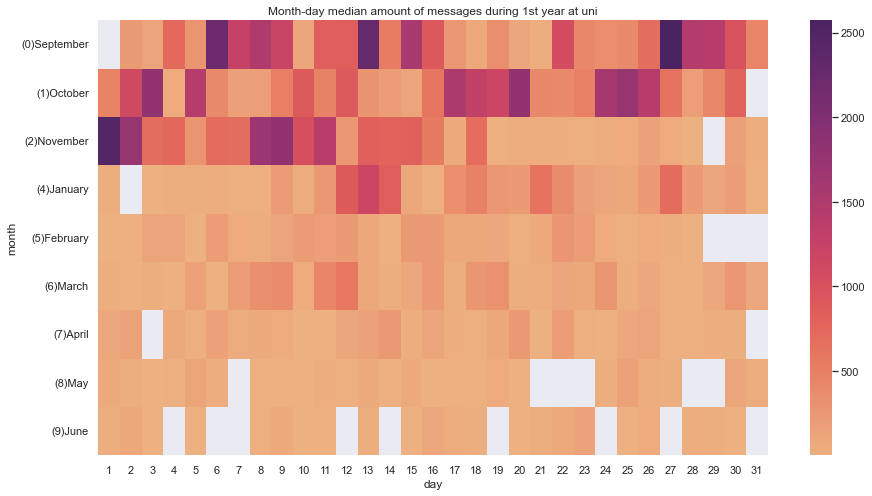

In [52]:
days_month =  primat_mes[primat_mes['date']<'2021-07-01 00:00:00']
days_month['date'] = days_month["date"].apply(lambda x: x.date())
days_month['day'] =days_month["date"].apply(lambda x: x.day)
days_month['month'] = days_month["date"].apply(lambda x: get_correct(x.month))
days_month = days_month.groupby(['month','day'], as_index=False)["message"].count()
days_month['month'] = days_month["month"].apply(lambda x: '('+str(x-1)+')'+month[x-1])
days_month = days_month.pivot("month", "day", "message").sort_values('month', ascending=True)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(days_month, cmap="flare")
plt.title("Month-day median amount of messages during 1st year at uni")
plt.show()

## Conclusion:
Now we can prove theory with this plot: people on 1st uni-year were most active during first term, when all were getting acquainted. Also we can see that during September and October we were very active on Sundays. We can see this cause 6th of September is Sunday, and then 13, 27 and so on.

# ☑

#  #6. How activity in primats' chat was changing during 1.5 years of studying

In [53]:
days_mes = primat_mes.copy()
days_mes['date'] = days_mes["date"].apply(lambda x: x.date())
days_mes = days_mes.groupby(['date'], as_index=False)["message"].count()
days_mes = days_mes.sort_values(by='date', ascending=True)


## 6.1 General activity plot

Text(0.5, 0, 'date')

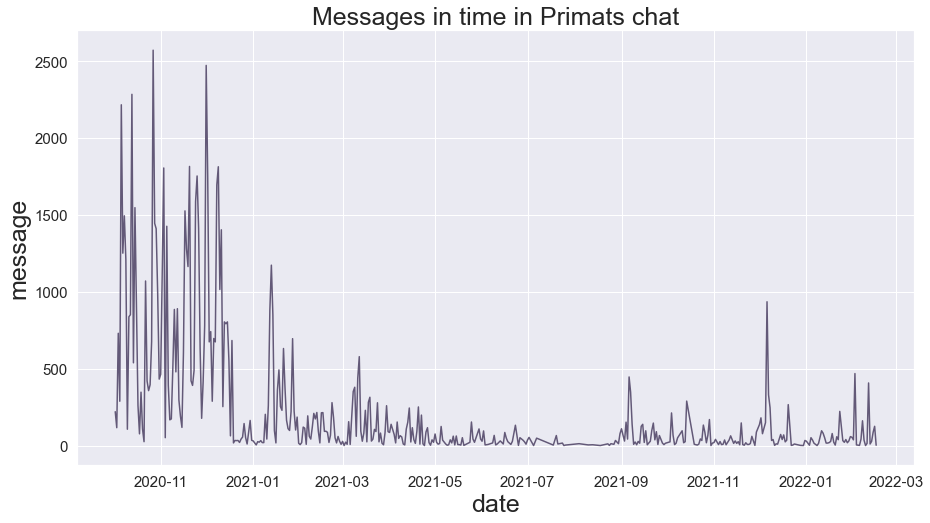

In [54]:
pl = days_mes.set_index("date")["message"].plot(kind="line", color = '#635978',
                                                     fontsize = 15,title="Messages in time in Primats chat",figsize=(15, 8))
pl.axes.title.set_size(25)
pl.set_ylabel('message', fontsize=25)
pl.set_xlabel('date', fontsize=25)

## What's interesting:
People in chat were most active in first term of our studying at university. Than activity quickly decreased with flares during exam sessions

In [55]:
color = ['#45D6C1','#3FBDC0','#4AA3B7','#588AA7','#617191','#635978','#5D435B','#56384D','#4E2F40']

In [56]:
m = days_mes.sort_values(by='message', ascending=False).head(9)

## 6.2 TOP-9 most active days in Primats' chat

Text(0.5, 0, 'date')

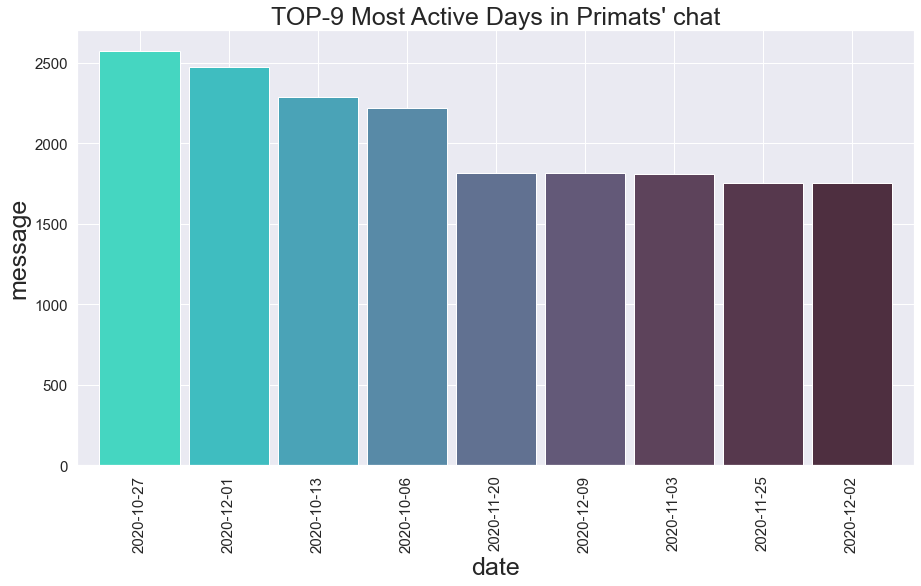

In [57]:
pl = m.set_index("date")["message"].plot(kind="bar", color=color,
                                                     fontsize = 15,width=0.9,title="TOP-9 Most Active Days in Primats' chat",figsize=(15, 8))
pl.axes.title.set_size(25)
pl.set_ylabel('message', fontsize=25)
pl.set_xlabel('date', fontsize=25)

# What's interesting:

We don't see any anomalic days. All are in the first term of first year at uni

# ★ Merged dataset.
# #7. General activity analysis

In [58]:
d = df_meta[['dialog_id', 'name', 'type']].copy()
d =d.drop_duplicates().reset_index(drop = True)
m = df.copy()
m = m.merge(d, on = "dialog_id")
def idus(str):
    if str!=str: return str
    s= str.split('=')[1][:-1]
    return s
m['from_id'] = m['from_id'].apply(lambda x: idus(x))
d = df_meta[['user_id', 'user_name']].copy()
m = m.merge(d,  left_on="from_id", right_on="user_id")
m = m.drop('user_id',1).rename(columns = {'user_name': 'from_name'}, inplace = False).rename(columns = {'type_x': 'mes_type'}, inplace = False).rename(columns = {'type_y': 'd_type'}, inplace = False)
m = m[['date', 'from_id','from_name', 'to_id', 'fwd_from','message', 'mes_type', 'duration', 'dialog_id', 'name','d_type']]
m = m.drop_duplicates().reset_index(drop = True)

# ☑



## 7.1 My activity in chats

Text(0.5, 0, 'date')

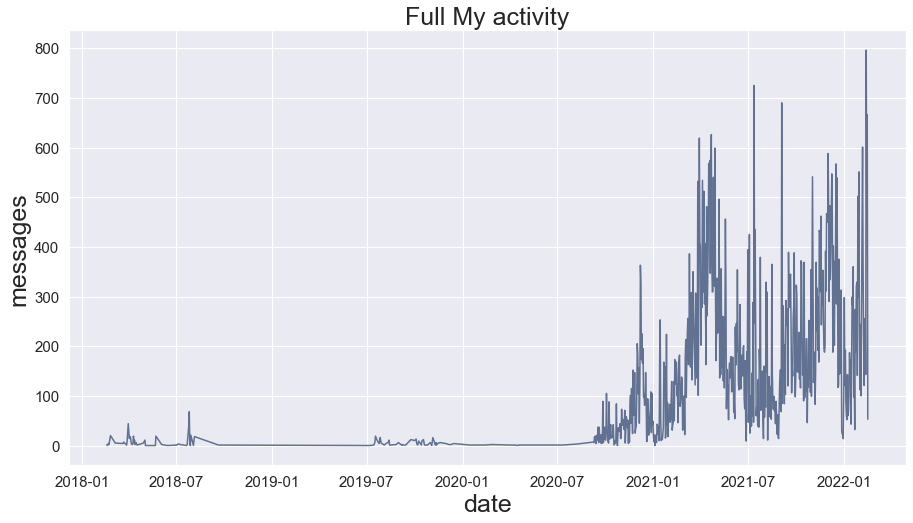

In [59]:
my_mes = m[m['from_name'].str.contains('Liza Andrych', na = False)].reset_index(drop = True)
gr = my_mes.copy()
gr['date'] = gr["date"].apply(lambda x: x.date())
gr = gr.groupby(['date'], as_index=False)["message"].count()
gr = gr.sort_values(by='date', ascending=True)
pl = gr.set_index("date")["message"].plot(kind="line", color = '#617191',
                                                     fontsize = 15,title="Full My activity",figsize=(15, 8))
pl.axes.title.set_size(25)
pl.set_ylabel('messages', fontsize=25)
pl.set_xlabel('date', fontsize=25)

## Conclusion:
so I started actively using this account starting from 2020-08 or 2020-09. So let's see at grapf starting from 2020-09

## 7.2 Activity from 2020-09 to now

Text(0.5, 0, 'date')

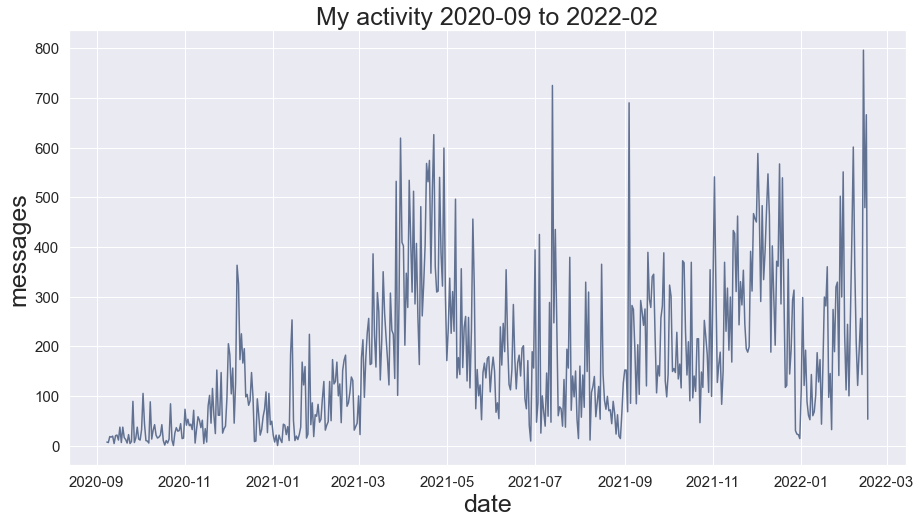

In [60]:
pl = gr[gr['date'] >= datetime.fromisoformat('2020-09-01').date()].set_index("date")["message"].plot(kind="line", color = '#617191',
                                                     fontsize = 15,title="My activity 2020-09 to 2022-02",figsize=(15, 8))
pl.axes.title.set_size(25)
pl.set_ylabel('messages', fontsize=25)
pl.set_xlabel('date', fontsize=25)

## What's interesting?
There are two interesting periods that looks a bit special: 2021-03 to 2021-08 and 2021-09 to 2022-01.
## But I can explain them:
these were periods when I got acquainted with two my friends-groupmates. Then we had the most active chatting 

### The most interesting is second one. Using this plot we can see when we had some quarrels. One was at the end of October and you can that median average of messages at that time decreased

## 7.3 Activity from 2020-09 to 2021-12-31

Text(0.5, 0, 'date')

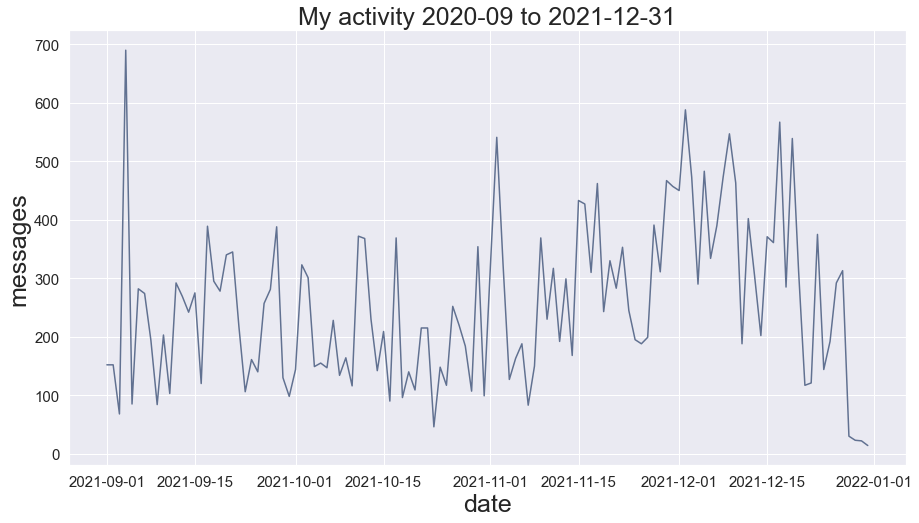

In [61]:
pl = gr[(gr['date'] >= datetime.fromisoformat('2021-09-01').date())&(gr['date'] <= datetime.fromisoformat('2021-12-31').date())].set_index("date")["message"].plot(kind="line", color = '#617191',
                                                     fontsize = 15,title="My activity 2020-09 to 2021-12-31",figsize=(15, 8))
pl.axes.title.set_size(25)
pl.set_ylabel('messages', fontsize=25)
pl.set_xlabel('date', fontsize=25)

### Here you also can see two hills and a quarrel at the end of October when we stopped chatting

## 7.4 Find day when I was most active


In [62]:
cc = gr.sort_values(by='message', ascending=False).head(10)
max = cc.iloc[0]['message']


Text(0.5, 1.0, 'TOP-10 My Most Active Days')

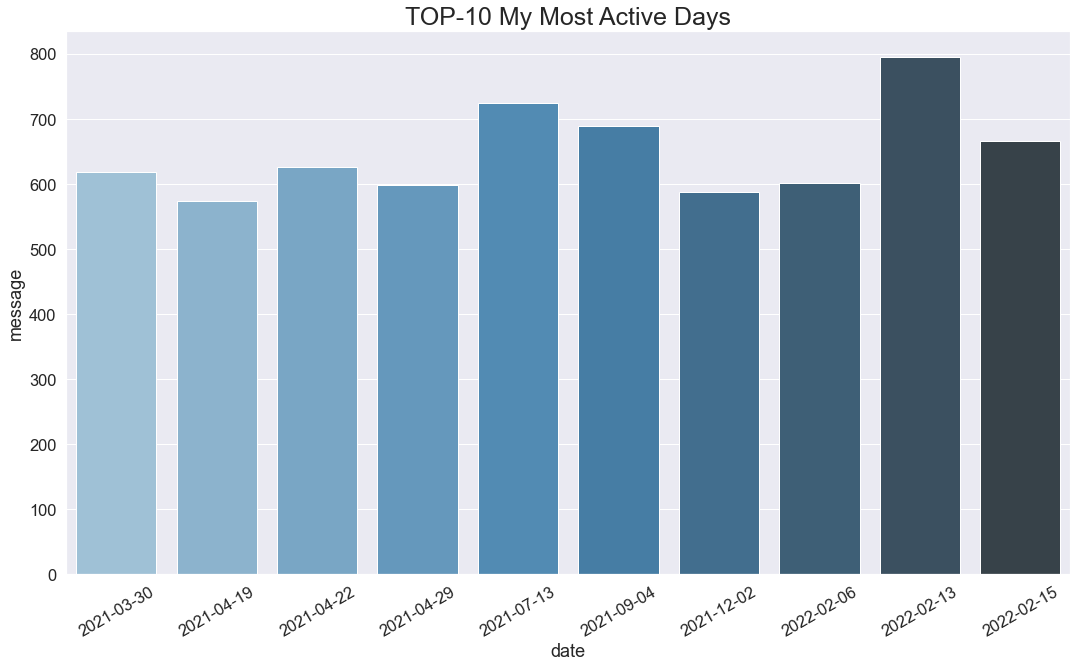

In [64]:
gr = gr.sort_values(by='message', ascending=False).head(10).sort_values(by='date', ascending=True)
sns.set(font_scale = 1.5)
plt.figure(figsize = (18, 10))
ax = sns.barplot(y = 'message', x = 'date', data = gr, palette="Blues_d") 
pl.axes.title.set_size(25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('TOP-10 My Most Active Days', fontsize=25)

## 7.5 My most active days in all groups 

Text(0.5, 1.0, 'Most Active Days in Groups')

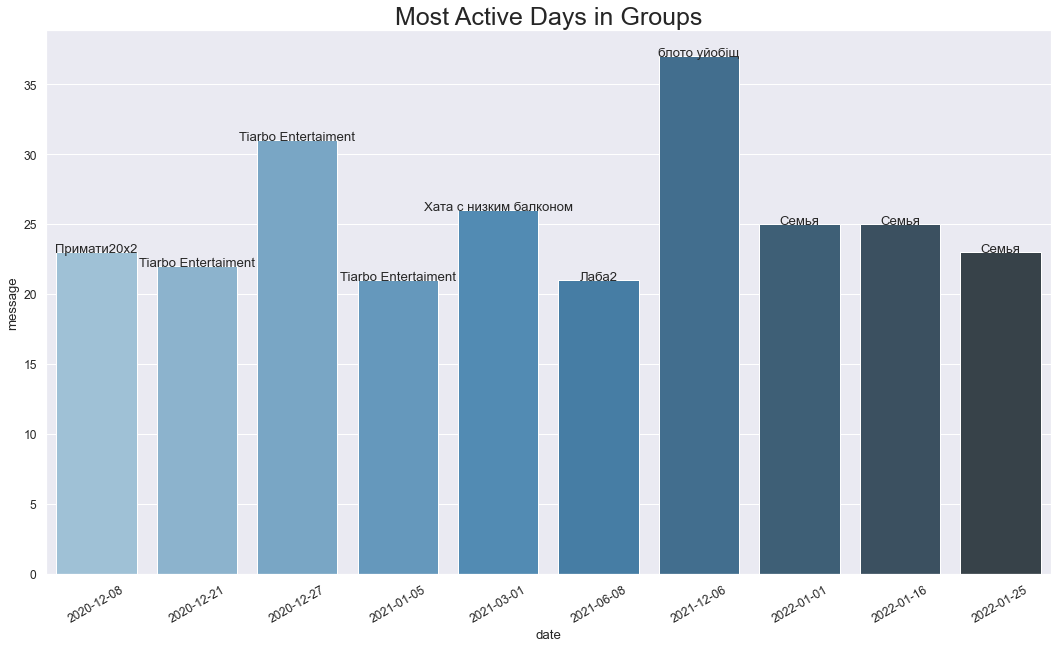

In [65]:
all = my_mes.copy()
all['date'] = all["date"].apply(lambda x: x.date())
gr = all[all['d_type'] == 'Group']
gr = gr.groupby(['name',"date"], as_index=False)["message"].count()
gr = gr.sort_values(by='message', ascending=False).head(10).sort_values(by='date', ascending=True)
plt.figure(figsize = (18, 10))
sns.set(font_scale = 1.1)
ax = sns.barplot(y = 'message', x = 'date', data = gr, palette="Blues_d")                                            
pl.axes.title.set_size(25)
for bar, label in zip(ax.patches, gr['name']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height, label, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most Active Days in Groups', fontsize=25)

## What's interesting? 
I am so unactive in chats...

## 7.6 My most active days in all private chats


Text(0.5, 1.0, 'Most Active Days in Private Dialogs')

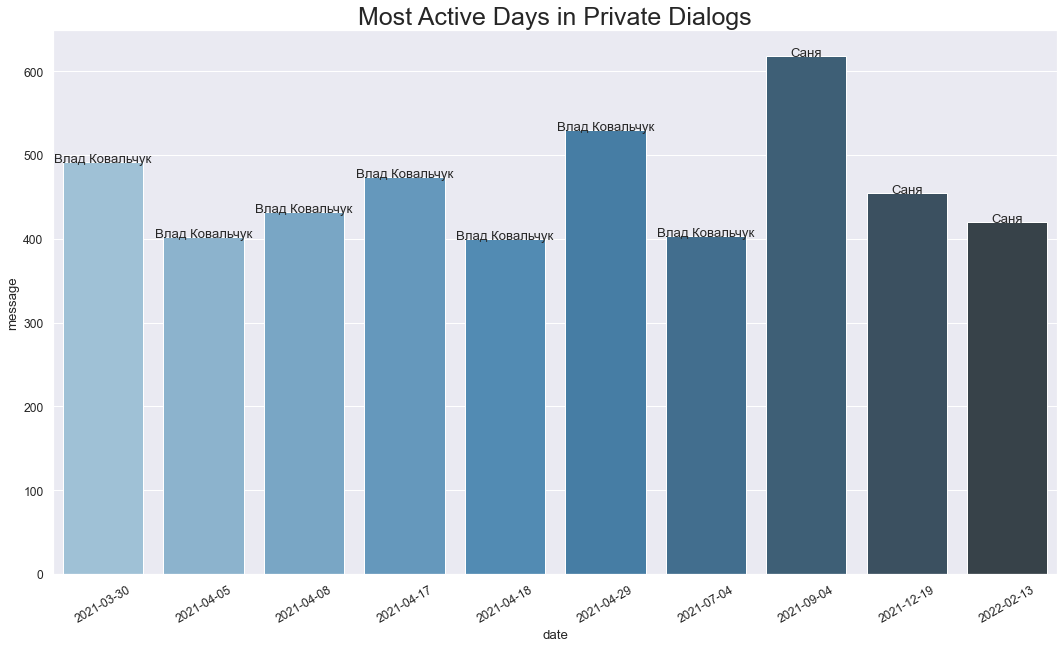

In [66]:
gr = all[all['d_type'] == 'Private dialog']
gr = gr.groupby(['name',"date"], as_index=False)["message"].count()
gr = gr.sort_values(by='message', ascending=False).head(10).sort_values(by='date', ascending=True)
plt.figure(figsize = (18, 10))
ax = sns.barplot(y = 'message', x = 'date', data = gr, palette="Blues_d")                                            
pl.axes.title.set_size(25)
for bar, label in zip(ax.patches, gr['name']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height, label, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most Active Days in Private Dialogs', fontsize=25)

## What's interesting? 
Most active chat-days are with two my friends


## 7.7 The most active minutes

Text(0.5, 1.0, 'My Most Active Minutes in Groups')

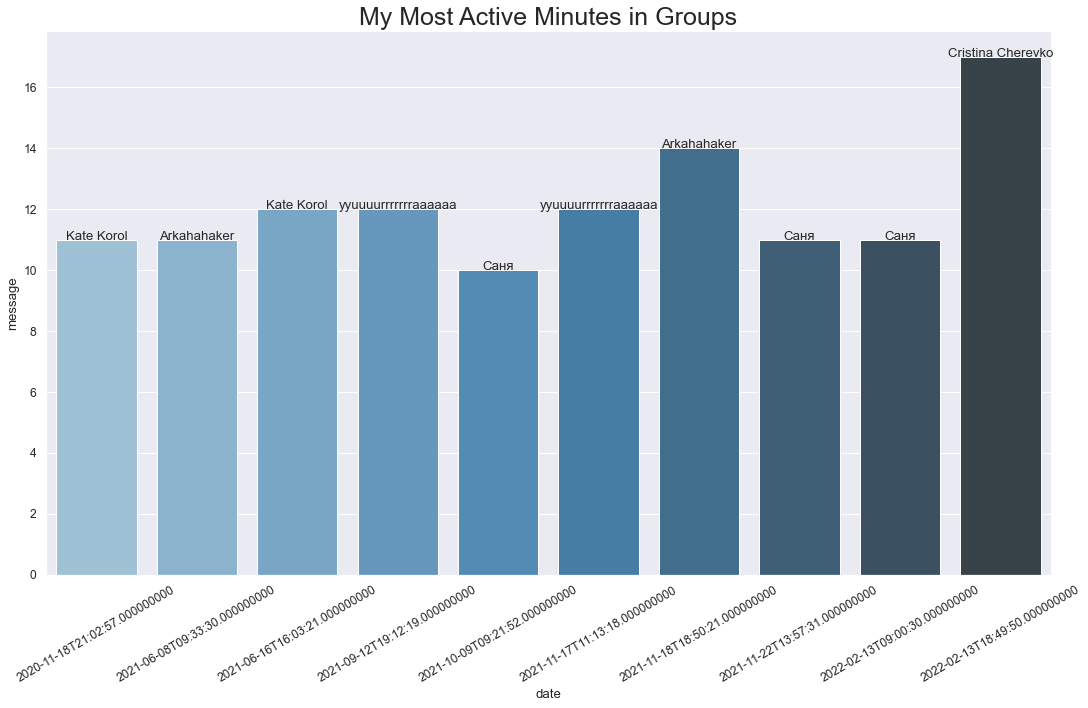

In [67]:
gr = my_mes.copy()
gr = gr[gr["mes_type"] == 'text']
gr = gr.groupby(['name',"date"], as_index=False)["message"].count()
gr = gr.sort_values(by='message', ascending=False).head(10).sort_values(by='date', ascending=True)
plt.figure(figsize = (18, 10))
ax = sns.barplot(y = 'message', x = 'date', data = gr, palette="Blues_d")                                            
pl.axes.title.set_size(25)
for bar, label in zip(ax.patches, gr['name']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height, label, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('My Most Active Minutes in Groups', fontsize=25)

## What's interesting?

Interesting that the biggest amount of messages in one minute are not forwarded. All were written about studying

# ☑

# #8. Analyzing emojis


In [68]:
import emoji
from emoji import UNICODE_EMOJI
count = Counter()
def getEm(mes):
    res =0
    for c in mes:
        if c in UNICODE_EMOJI['en']:
            res +=1
            count.update(c)

    return res


In [69]:
em = m[m['message'].notnull()]
em['emojies'] = em['message'].apply(lambda x: getEm(x))

common = count.most_common(150)
text =''
for i in common:
    text+=i[0]+' '
emoj = pd.DataFrame(common)
emoj = emoj.rename(columns = {0: 'emoji', 1: 'number'}, inplace = False)


## 8.1 Top usable emojis

In [70]:
emoj.head(10)

emoji  number
0     😂    4716
1     👍    2752
2     ❤    2630
3     😅    2363
4     🥺    1613
5     😭    1593
6     😍    1543
7     😎    1508
8     😳    1019
9     🤡     845

In [71]:
import plotly.express as px


In [72]:
pl = emoj.head(10)
fig = px.bar(pl, y = 'number', x = 'emoji', title="Most often emojis")
fig.show()

## 8.2 Let's see how people use old school smiles and emojis

### I like using old school ones so it is interesting to see who loves too

In [73]:
old_sc = {':)',':(','))','((',';)',';(',':D','-_-',':0','^_^',';/',':/',';0',';D',':|'}

In [74]:
import collections


In [75]:
old_sm = {':)':0,':(':0,'))':0,'((':0,';)':0,';(':0,':D':0,'-_-':0,':0':0,'^_^':0,';/':0,':/':0,';0':0,';D':0,':|':0}
def oldsm(mes):
    res =0
    for c in old_sc:
        if c in mes:
            res +=mes.count(c)
            old_sm[c]+=1
    return res

In [76]:
em['old_sm'] = em['message'].apply(lambda x: oldsm(x))
tt = em[~(em['from_id'] ==my_id)].groupby(['from_name'])

Text(0.5, 1.0, 'People who use the biggest amount of old school smiles or emojis')

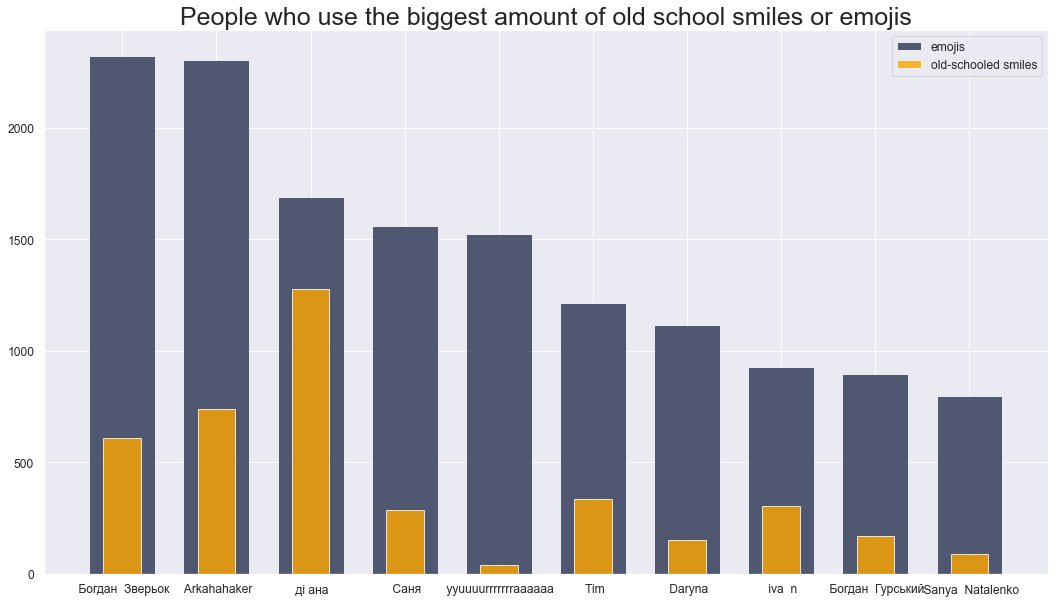

In [77]:
new = tt[['emojies','old_sm']].sum().sort_values(by='emojies', ascending=False).reset_index().head(10)
old = tt[['emojies','old_sm']].sum().sort_values(by='old_sm' , ascending=False).reset_index().head(10)
an = new.merge(old, how ='outer').head(10)
plt.figure(figsize = (18, 10))
plt.bar(an["from_name"], an["emojies"], color="#283350", label='Emojis', width=.7, alpha=0.8)
plt.bar(an["from_name"], an["old_sm"], color="#ffa600", label='Old smiles', width=.4, alpha=.8)
plt.legend(['emojis','old-schooled smiles'])
plt.title('People who use the biggest amount of old school smiles or emojis', fontsize=25)

## What's interesting?
We can see that people do use old-school smiles. But using emojies you can show more emotions more quickly so they are more popular

## 8.3 Most often old-schooled emojis

Text(0.5, 1.0, 'Most Often Old-School Smiles')

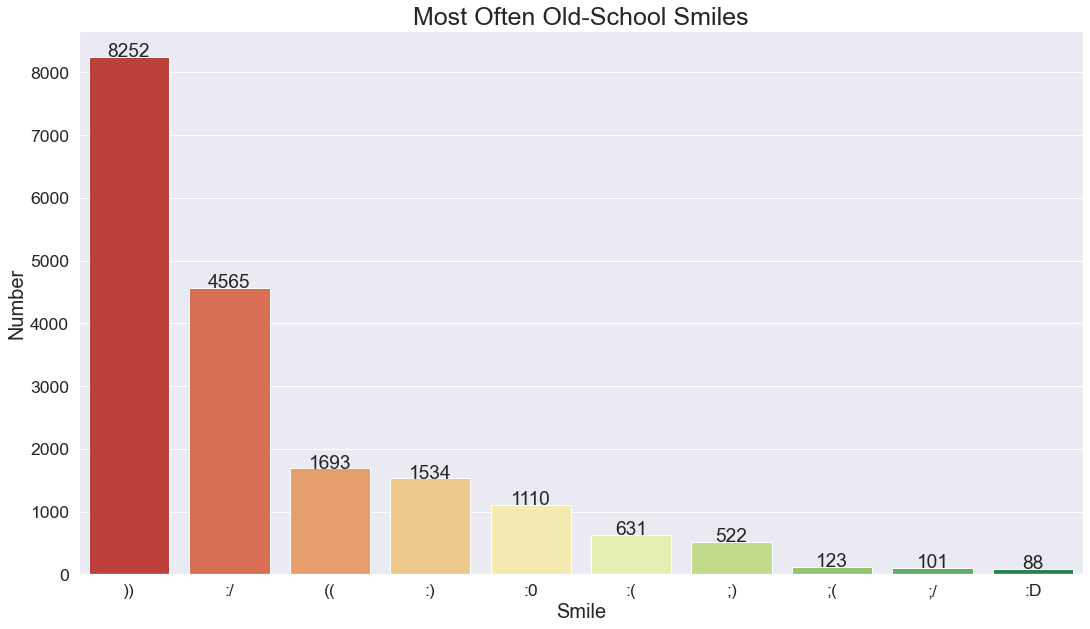

In [78]:
me = pd.DataFrame(old_sm.items(), columns=['Smile', 'Number'])
me = me.sort_values(by='Number', ascending=False).head(10)
plt.figure(figsize = (18, 10))
sns.set(font_scale = 1.6)
ax = sns.barplot(y = 'Number', x = 'Smile', data = me, palette="RdYlGn")                                            
ax.set_ylabel('Number', fontsize=20)
ax.set_xlabel('Smile', fontsize=20)
for bar, label in zip(ax.patches, me['Number']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height, label, ha="center") 

plt.title('Most Often Old-School Smiles', fontsize=25)


## What's interesting?
We see that the most popular one is the simpliest one

## 8.4 Same statistic for me: emojis vs smiles

array([<AxesSubplot:>], dtype=object)

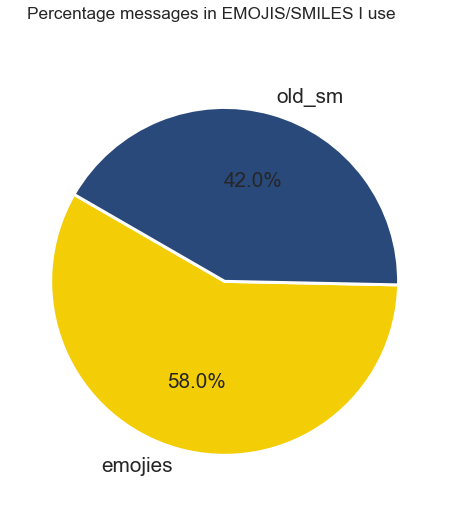

In [79]:
sns.set(font_scale = 1.2)
em[em['from_id']==my_id][['emojies','old_sm']].sum().plot.pie(subplots =True,colors = ["#F3CD05", "#28497a"], autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
        startangle=150, ylabel='', title="Percentage messages in EMOJIS/SMILES I use",  figsize=(15, 8))

## What's interesting?
I love using old-schooled smiles :)

# #9. Analysis of message length of different people (length of messages in symbols)


## 9.1 Find person who writes the biggest messages and the smallest



In [80]:
l = m[(m['message'].notnull())]
l['length'] = l['message'].apply(lambda x: len(x))
l.groupby('from_name', as_index=False)['length'].median().sort_values(by='length', ascending=False).reset_index().head(10)

index             from_name  length
0   1247          Юлія  Клюєва  1088.0
1     94                  Anne   921.0
2   1241          Юлиана  Назо   850.0
3    498   Oleksandra  Chazova   739.0
4    419         Max  Ksondzyk   539.5
5    150                Danylo   499.0
6    242       Fourier Serious   417.5
7     20         Alex  Anoshyn   409.5
8    620      Tanya  Tkachenko   402.0
9    929        Андрій  Сердюк   363.5

## Conslusion: 
Almost all people here are unknown for me. They are from dormitory chat or faculty one. So let's analyze private chats

Text(0.5, 0, 'author')

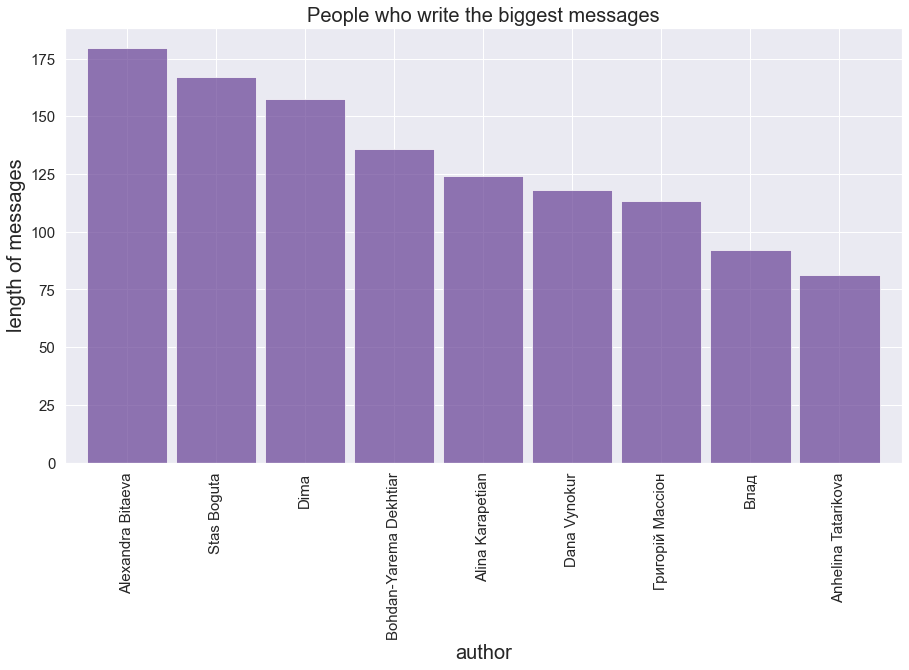

In [81]:
mes = l[l['d_type'] == 'Private dialog']
mes = l.groupby('name', as_index=False)['length'].median().sort_values(by='length', ascending=False).reset_index().head(9)
pl = mes.set_index("name")["length"].plot(kind="bar", color='#663F94',
                                                     fontsize = 15,width=0.9,title="People who write the biggest messages",figsize=(15, 8), alpha=0.7)
pl.axes.title.set_size(20)
pl.set_ylabel('length of messages', fontsize=20)
pl.set_xlabel('author', fontsize=20)


## What's interesting?
Most people here are much older than me, so older people write longer messages

## 9.2 People who write the shortest messages

In [82]:
mes = l[l['d_type'] == 'Private dialog']
mes = l.groupby('name', as_index=False)['length'].median().sort_values(by='length', ascending=True).reset_index().head(9)
mes.head(10)

index                          name  length
0    168              Квест до Колодія     2.0
1     70                       Matcher     4.5
2    151                      Викуля 🦭     5.0
3     89                      Stickers     5.0
4    215  Уроки дизайна от Яна Агеенко     6.0
5     28                          DMSU     6.0
6     37                  Diana Oskner     6.0
7    118                       osmd59k     6.0
8    124                    Іван Сірко     6.0

### Here there are mostly bots, they are not interesting for us. Lets analyze certain chat


## 9.3 Primats chat : longest messages

In [83]:
pr = m[(m['message'].notnull())&(m['name'] == 'Примати20х2')]
pr['length'] = pr['message'].apply(lambda x: len(x))
pr = pr.groupby('from_name', as_index=False)['length'].median().sort_values(by='length', ascending=False).reset_index(drop = True)


Text(0.5, 0, 'author')

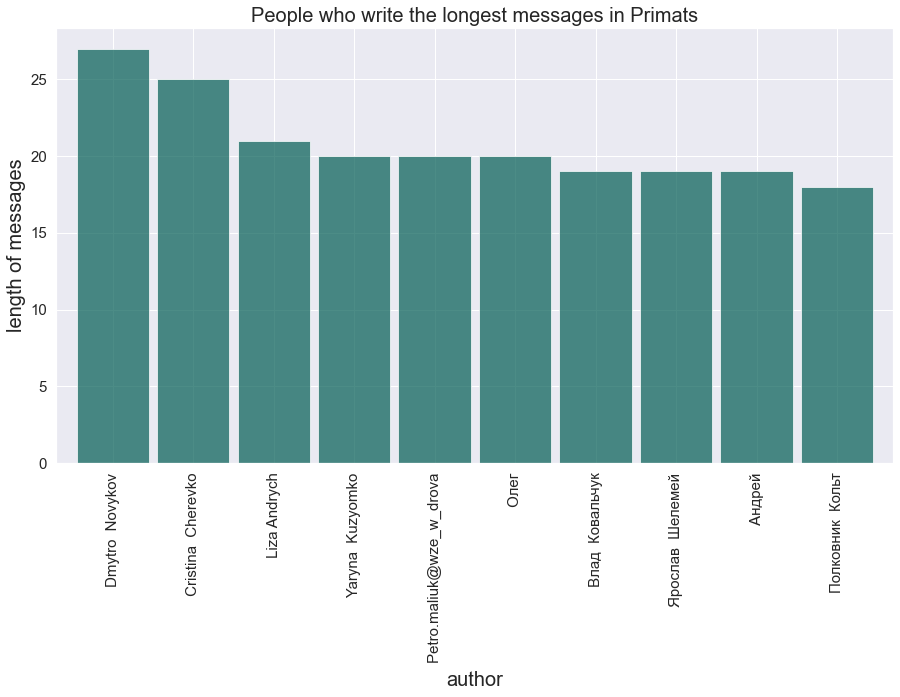

In [84]:
pl = pr.head(10).set_index("from_name")["length"].plot(kind="bar", color='#005C53',
                                                     fontsize = 15,width=0.9,title="People who write the longest messages in Primats",figsize=(15, 8), alpha=0.7)
pl.axes.title.set_size(20)
pl.set_ylabel('length of messages', fontsize=20)
pl.set_xlabel('author', fontsize=20)

## What's interesting?
I am in top-3. Maybe because I am not active and usually only answer questions about studying

## 9.4 Primats chat: shortest messages

Text(0.5, 0, 'author')

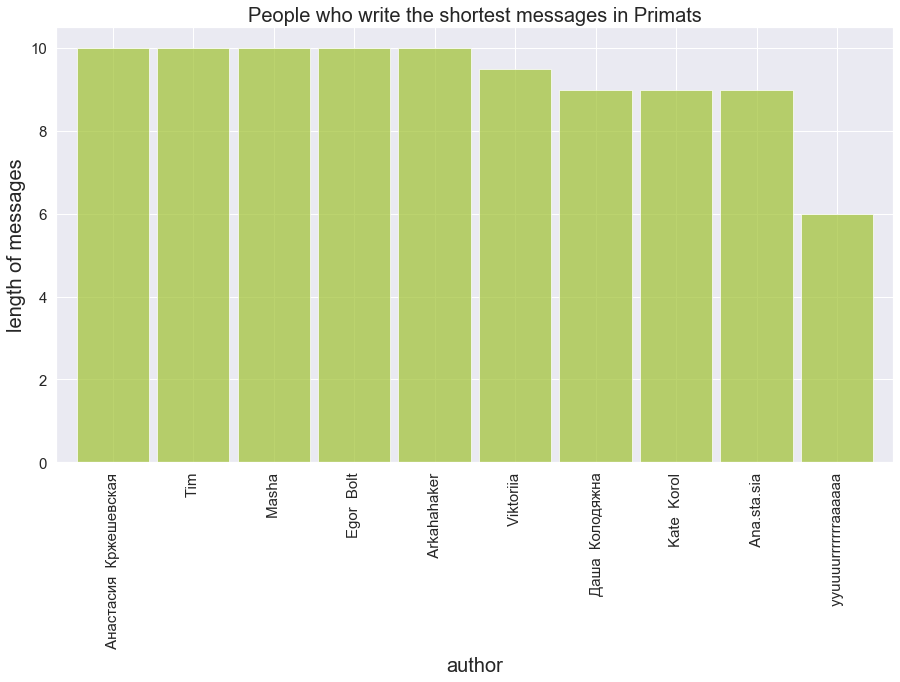

In [85]:
pl = pr.tail(10).set_index("from_name")["length"].plot(kind="bar", color='#9FC131',
                                                     fontsize = 15,width=0.9,title="People who write the shortest messages in Primats",figsize=(15, 8), alpha=0.7)
pl.axes.title.set_size(20)
pl.set_ylabel('length of messages', fontsize=20)
pl.set_xlabel('author', fontsize=20)


## What's interesting?
We all write short messages, because the biggest median message here is 10 characters, while among all people I have chats with it is 1088 symbols

# #10. Activity in Primats' chat

## 10.1 Most active people in Primats' chat

Text(0.5, 1.0, 'TOP-10 Most Active People')

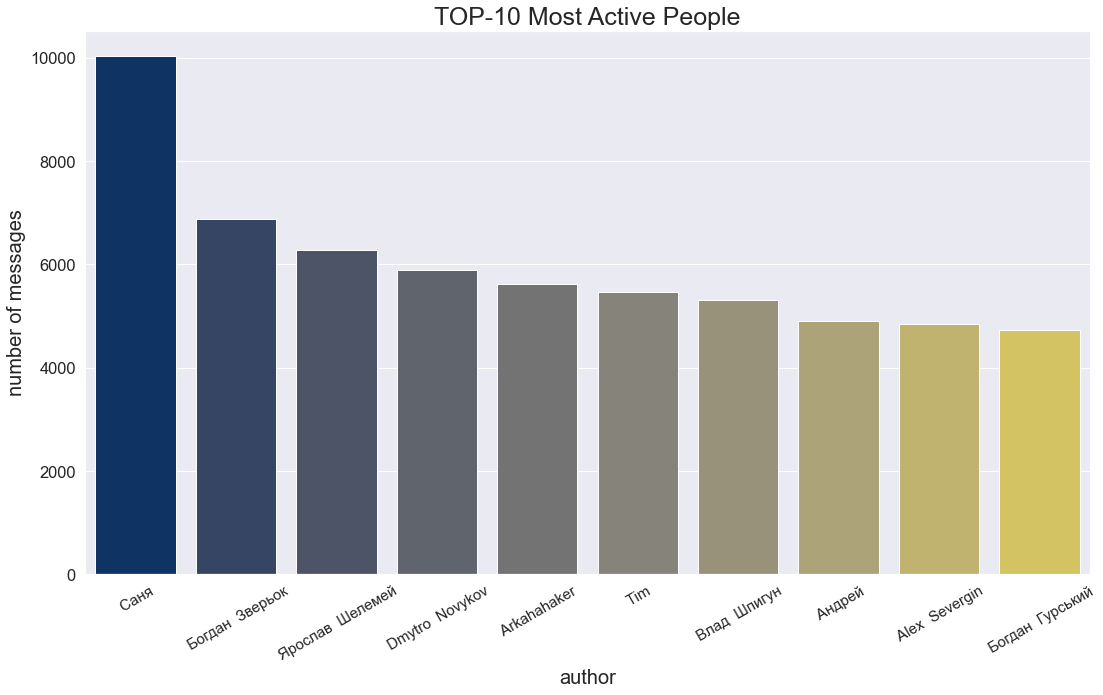

In [86]:
prim = m[(m['message'].notnull())&(m['name'] == 'Примати20х2')]
p = prim.groupby('from_name', as_index=False)['message'].count().sort_values(by='message', ascending=False).head(10)
plt.figure(figsize = (18, 10))
sns.set(font_scale = 1.5)
ax = sns.barplot(y = 'message', x = 'from_name', data = p, palette="cividis") 
ax.set_ylabel('number of messages',size=20)
ax.set_xlabel('author',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30,fontsize=15)
plt.title('TOP-10 Most Active People', fontsize=25)

## What's interesting?
Here we don't see any girl. So we can repeatedly prove that boys are much more active

## 10.2 Let's find top active people for 2021 year

In [87]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December']


Text(0.5, 1.0, 'Most Active People for each month in 2021')

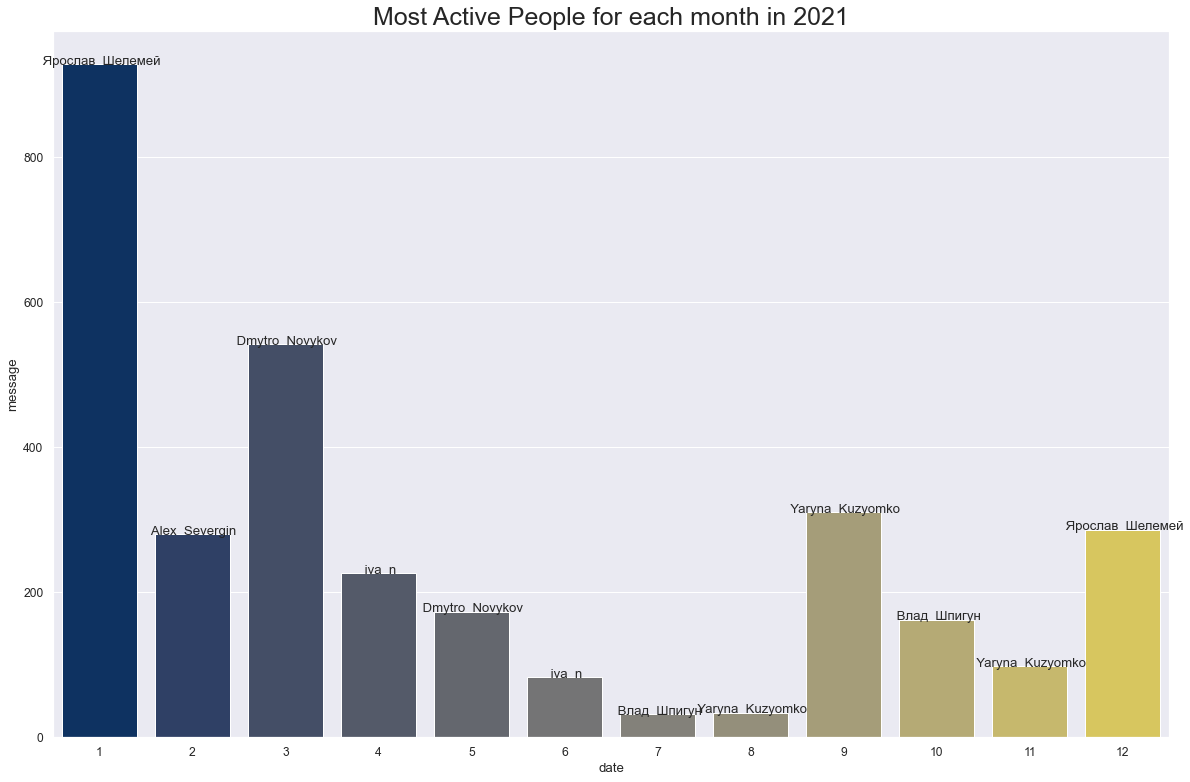

In [88]:
p = prim[(prim["date"]>'2020-12-31 23:59:59') & (prim["date"]<'2022-01-01 00:00:00')]
p['date'] = p['date'].apply(lambda x : int(str(x)[5:-12]))
p = p.groupby(['from_name','date'], as_index=False)['message'].count().sort_values(by='message', ascending=False)
top = pd.DataFrame()
for i in range(1,13):
    top = top.append(p[p['date']==i].sort_values(by='message', ascending=False).head(1),ignore_index=True)
sns.set(font_scale = 1.1)
plt.figure(figsize = (20, 13))
ax = sns.barplot(y = 'message', x = 'date', data = top, palette="cividis")                                            
pl.axes.title.set_size(25)
for bar, label in zip(ax.patches, top['from_name']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height, label, ha="center") 
plt.title('Most Active People for each month in 2021', fontsize=25)


## 10.3 Top active people for each month for all time

Text(0.5, 1.0, 'Most Active People for each month')

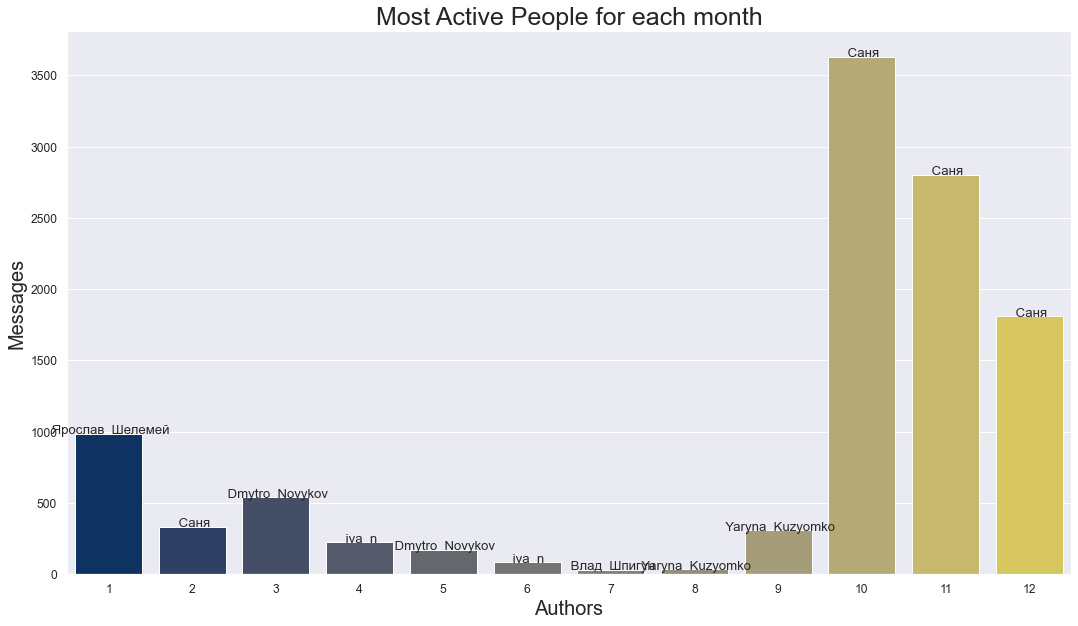

In [89]:
p = prim.copy()
p['date'] = p['date'].apply(lambda x : int(str(x)[5:-12]))
p = p.groupby(['from_name','date'], as_index=False)['message'].count().sort_values(by='message', ascending=False)
top = pd.DataFrame()
for i in range(1,13):
    top = top.append(p[p['date']==i].sort_values(by='message', ascending=False).head(1),ignore_index=True)
top
plt.figure(figsize = (18, 10))
ax = sns.barplot(y = 'message', x = 'date', data = top, palette="cividis")                                            
pl.axes.title.set_size(25)

for bar, label in zip(ax.patches, top['from_name']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height, label, ha="center") 
ax.set_ylabel('Messages', fontsize=20)
ax.set_xlabel('Authors', fontsize=20)
plt.title('Most Active People for each month', fontsize=25)


## What's interesting?
Interesting that we can see that Sasha was really active in autumn. Maybe he wrote the biggest part of messages of that period

# ☑

# #11. TIKTOK messages


### Sometimes I send some tiktok videos to my friends. Let's see at my activity


In [90]:
tiktoks = m[(m['message'].str.contains('tiktok.com', na = False) & m['from_id'].str.contains(my_id))]
tiktoks['date'] = tiktoks["date"].apply(lambda x: x.date())

## 11.1 Activity sending TIKTOKS during all timeline

Text(0.5, 0, 'date')

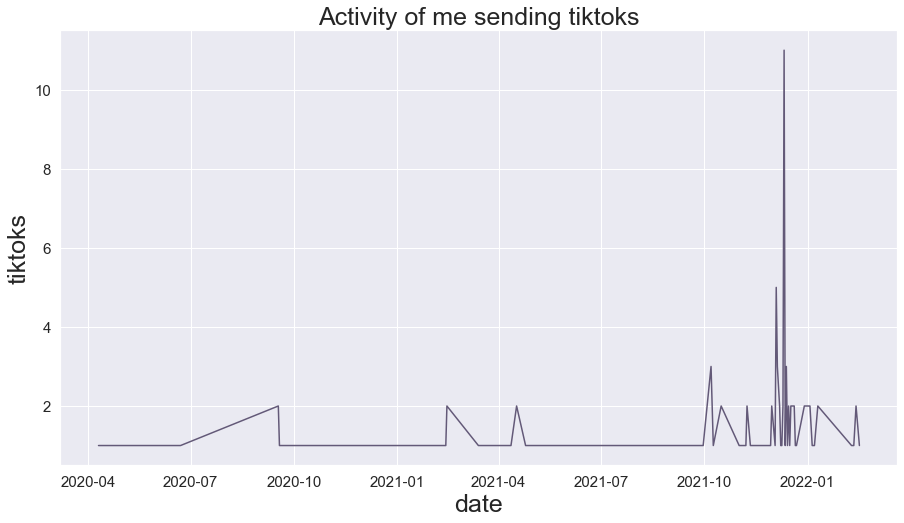

In [91]:
tik = tiktoks.groupby(['date'], as_index=False)["message"].count()
tik = tik.sort_values(by='date', ascending=True)
pl = tik.set_index("date")["message"].plot(kind="line", color = '#635978',
                                                     fontsize = 15,title="Activity of me sending tiktoks",figsize=(15, 8))
pl.axes.title.set_size(25)
pl.set_ylabel('tiktoks', fontsize=25)
pl.set_xlabel('date', fontsize=25)

## What's interesting?
I use to send tiktoks, but not so often as I thought. The biggest amount is sent in December of 2021
## Let's see at date when I send the biggest amounts of them

In [92]:
str(tik.sort_values(by='message', ascending=False).iloc[0,0])

'2021-12-11'

## 11.2 To whom I send tiktoks?

In [95]:
tik = tiktoks.groupby(['date','name'], as_index=False)["message"].count().sort_values(by='message', ascending=False)
tik.head(15)

date           name  message
72  2021-12-11           Саня       10
64  2021-12-04           Саня        5
65  2021-12-05           Саня        3
74  2021-12-13           Саня        3
56  2021-11-08           Саня        2
27  2021-04-17       МоноКатя        2
70  2021-12-10           Саня        2
22  2021-02-14   Анастасиииия        2
62  2021-11-30           Саня        2
79  2021-12-17           Саня        2
81  2021-12-20           Саня        2
49  2021-10-07       МоноКатя        2
80  2021-12-19          Семья        2
92  2022-02-13           Саня        2
89  2022-01-10  Olya Kucheruk        2

## To whom I send more tiktoks

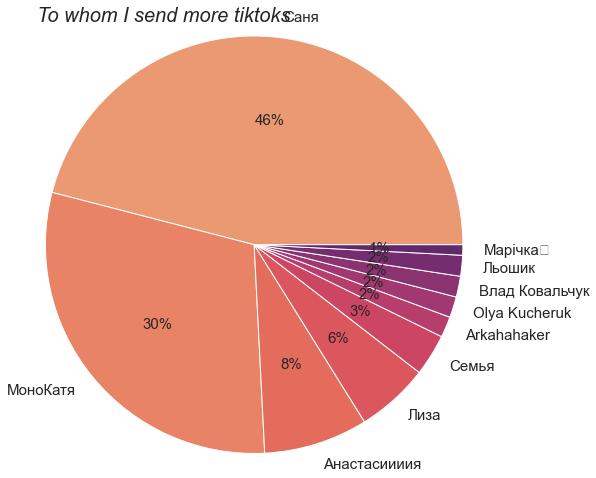

In [100]:
data = tik.groupby('name', as_index=False)["message"].sum().sort_values(by='message', ascending=False).head(10)
colors = sns.color_palette("flare",10)
plt.pie(data['message'], labels = data['name'], colors = colors, autopct='%.0f%%',radius=1.2, textprops={'fontsize': 15})
plt.title("To whom I send more tiktoks",loc="left", fontstyle='italic',fontsize=20)

plt.show()

## What's interesting?
We can see that the biggest amounts of tiktoks were send to my sister(МоноКатя) and my friend. And 76% of all tiktoks were send only to two people.

## To whom I sent tiktoks mre regularly

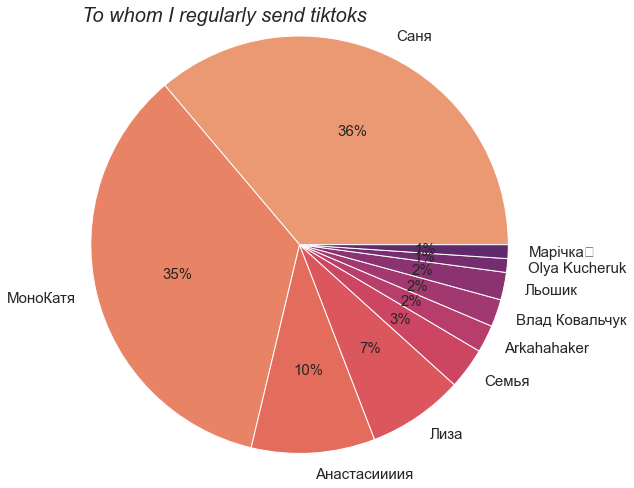

In [101]:
data = tik.groupby('name', as_index=False)["date"].count().sort_values(by='date', ascending=False).head(10)
colors = sns.color_palette("flare",10)
plt.pie(data['date'], labels = data['name'], colors = colors, autopct='%.0f%%',radius=1.2, textprops={'fontsize': 15})
plt.title("To whom I regularly send tiktoks",loc="left", fontstyle='italic',fontsize=20)

plt.show()

## What's interesting?
We can see that I sent tiktoks equally regular to my sister and my friend.

## Conclusion:
Almost 8 out of 10 tiktoks are send to Kate or Sasha.
Sasha had got more tiktoks than Kate, BUT they get this tiktoks with the same regularity.